In [7]:
!pip install pymysql


In [8]:
!pip install pandas

In [9]:
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

# ระบุที่อยู่ของฟอนต์ที่รองรับภาษาไทย
font_path = 'C:/Windows/Fonts/tahoma.ttf' # เปลี่ยนเป็นฟอนต์ที่คุณต้องการใช้
font_prop = fm.FontProperties(fname=font_path)

# ตั้งค่าฟอนต์ให้กับ Matplotlib
plt.rcParams['font.family'] = font_prop.get_name()

In [10]:
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(font)

C:\Windows\Fonts\segoepr.ttf
C:\Windows\Fonts\mmrtextb.ttf
C:\Windows\Fonts\NirmalaS.ttf
C:\Windows\Fonts\calibriz.ttf
C:\Windows\Fonts\upcii.ttf
C:\Windows\Fonts\holomdl2.ttf
C:\Windows\Fonts\segoesc.ttf
C:\Windows\Fonts\HPSimplified_BdIt.ttf
C:\Windows\Fonts\upckbi.ttf
C:\Windows\Fonts\segoeuib.ttf
C:\Windows\Fonts\courbi.ttf
C:\Windows\Fonts\Gabriola.ttf
C:\Windows\Fonts\seguibl.ttf
C:\Windows\Fonts\SitkaVF.ttf
C:\Windows\Fonts\upcjbi.ttf
C:\Windows\Fonts\YuGothL.ttc
C:\Windows\Fonts\upckb.ttf
C:\Windows\Fonts\timesi.ttf
C:\Windows\Fonts\constani.ttf
C:\Windows\Fonts\calibrili.ttf
C:\Windows\Fonts\corbel.ttf
C:\Windows\Fonts\hpsimplifiedhans-light.ttf
C:\Windows\Fonts\seguihis.ttf
C:\Windows\Fonts\msjhl.ttc
C:\Windows\Fonts\upcel.ttf
C:\Windows\Fonts\calibrib.ttf
C:\Windows\Fonts\simsun.ttc
C:\Windows\Fonts\segoeprb.ttf
C:\Windows\Fonts\corbelli.ttf
C:\Windows\Fonts\trebucit.ttf
C:\Windows\Fonts\Candarab.ttf
C:\Windows\Fonts\constanb.ttf
C:\Windows\Fonts\msyi.ttf
C:\Windows\Fonts\up

In [11]:
import pymysql
import pandas as pd
# ข้อมูลการเชื่อมต่อ
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    database='theawkanmai',
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
)

# สร้าง cursor เพื่อใช้ในการดึงข้อมูล

# สร้าง cursor เพื่อใช้ในการดึงข้อมูล
cursor = connection.cursor()

# ดึงข้อมูลจากตาราง ans_interest
cursor.execute("SELECT * FROM ans_interest")
ans_interest_data = cursor.fetchall()

# ดึงข้อมูลจากตาราง form_member
cursor.execute("SELECT * FROM form_member")
form_member_data = cursor.fetchall()

# ดึงข้อมูลจากตาราง eva_form1
cursor.execute("SELECT * FROM eva_form1")
eva_form1_data = cursor.fetchall()

# ดึงข้อมูลจากตาราง eva_form2
cursor.execute("SELECT * FROM eva_form2")
eva_form2_data = cursor.fetchall()

# ปิดการเชื่อมต่อ
cursor.close()
connection.close()

# สร้าง DataFrame สำหรับแต่ละตาราง
df_ans_interest = pd.DataFrame(ans_interest_data)
df_form_member = pd.DataFrame(form_member_data)
df_eva_form1 = pd.DataFrame(eva_form1_data)
df_eva_form2 = pd.DataFrame(eva_form2_data)

# แสดงข้อมูลเบื้องต้นของแต่ละตาราง
print(df_ans_interest.head())
print(df_form_member.head())
print(df_eva_form1.head())
print(df_eva_form2.head())

OperationalError: (2003, "Can't connect to MySQL server on 'localhost' ([WinError 10061] No connection could be made because the target machine actively refused it)")

In [ ]:
# สร้าง DataFrame สำหรับแต่ละตาราง
df_ans_interest = pd.DataFrame(ans_interest_data)
df_form_member = pd.DataFrame(form_member_data)
df_eva_form1 = pd.DataFrame(eva_form1_data)
df_eva_form2 = pd.DataFrame(eva_form2_data)

In [ ]:
df_ans_interest

,id_member,ans1,ans2,ans3,ans4,ans5,ans6,ans7,ans8
0,1053,1,0,0,0,0,0,0,0
1,1089,1,0,0,0,0,0,0,0
2,1157,1,1,0,0,0,0,0,0
3,1189,1,1,1,0,0,0,0,0
4,1245,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
352,5694,1,0,0,0,0,0,0,0
353,5695,1,0,0,0,0,0,0,0
354,5696,1,0,1,1,0,0,0,1
355,5697,0,1,1,0,0,0,0,0


In [ ]:
df_ans_interest['id_member'] = df_ans_interest['id_member'].astype(str)
df_form_member['id_member'] = df_form_member['id_member'].astype(str)
df_eva_form1['id_member'] = df_eva_form1['id_member'].astype(str)
df_eva_form2['id_member'] = df_eva_form2['id_member'].astype(str)

# ดำเนินการ merge ใหม่
merged_data = pd.merge(df_ans_interest, df_form_member, on='id_member', how='inner')
merged_data = pd.merge(merged_data, df_eva_form1, on='id_member', how='inner')
merged_data = pd.merge(merged_data, df_eva_form2, on='id_member', how='inner')

In [ ]:
merged_data

,id_member,ans1,ans2,ans3,ans4,ans5,ans6,ans7,ans8,ans_form1,...,eva_p2_ans10,eva_p2_ans11,eva_p2_ans12,eva_p2_ans13,eva_p2_ans14,eva_p2_ans15,eva_p2_ans16,eva_p2_ans17,eva_p2_ans18,eva_p2_ans19
0,1053,1,0,0,0,0,0,0,0,1,...,4,5,5,5,5,5,5,5,5,5
1,1089,1,0,0,0,0,0,0,0,1,...,4,4,3,5,4,5,5,5,5,5
2,1157,1,1,0,0,0,0,0,0,1,...,5,5,5,5,5,5,5,5,5,5
3,1189,1,1,1,0,0,0,0,0,2,...,4,4,3,4,3,3,3,4,4,3
4,1245,1,0,0,1,1,0,0,0,2,...,5,4,5,5,3,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,5694,1,0,0,0,0,0,0,0,2,...,4,4,5,5,5,5,5,5,5,5
353,5695,1,0,0,0,0,0,0,0,1,...,3,3,4,4,4,4,3,4,3,3
354,5696,1,0,1,1,0,0,0,1,2,...,3,3,5,5,5,5,5,4,5,4
355,5697,0,1,1,0,0,0,0,0,3,...,3,3,3,4,3,4,2,3,3,3


In [ ]:
df1 = merged_data.rename(columns={
    'ans1': 'แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ',
    'ans2': 'แหล่งท่องเที่ยวเชิงอาหาร',
    'ans3': 'แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี',
    'ans4': 'แหล่งท่องเที่ยวเชิงเกษตร',
    'ans5': 'แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต',
    'ans6': 'แหล่งท่องเที่ยวเชิงผจญภัย',
    'ans7': 'แหล่งท่องเที่ยวเชิงสุขภาพ',
    'ans8': 'แหล่งท่องเที่ยวเชิงศาสนา'
})


In [ ]:
df1

,id_member,แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ,แหล่งท่องเที่ยวเชิงอาหาร,แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี,แหล่งท่องเที่ยวเชิงเกษตร,แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต,แหล่งท่องเที่ยวเชิงผจญภัย,แหล่งท่องเที่ยวเชิงสุขภาพ,แหล่งท่องเที่ยวเชิงศาสนา,ans_form1,...,eva_p2_ans10,eva_p2_ans11,eva_p2_ans12,eva_p2_ans13,eva_p2_ans14,eva_p2_ans15,eva_p2_ans16,eva_p2_ans17,eva_p2_ans18,eva_p2_ans19
0,1053,1,0,0,0,0,0,0,0,1,...,4,5,5,5,5,5,5,5,5,5
1,1089,1,0,0,0,0,0,0,0,1,...,4,4,3,5,4,5,5,5,5,5
2,1157,1,1,0,0,0,0,0,0,1,...,5,5,5,5,5,5,5,5,5,5
3,1189,1,1,1,0,0,0,0,0,2,...,4,4,3,4,3,3,3,4,4,3
4,1245,1,0,0,1,1,0,0,0,2,...,5,4,5,5,3,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,5694,1,0,0,0,0,0,0,0,2,...,4,4,5,5,5,5,5,5,5,5
353,5695,1,0,0,0,0,0,0,0,1,...,3,3,4,4,4,4,3,4,3,3
354,5696,1,0,1,1,0,0,0,1,2,...,3,3,5,5,5,5,5,4,5,4
355,5697,0,1,1,0,0,0,0,0,3,...,3,3,3,4,3,4,2,3,3,3


In [ ]:
df1.columns

Index(['id_member', 'แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ',
       'แหล่งท่องเที่ยวเชิงอาหาร', 'แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี',
       'แหล่งท่องเที่ยวเชิงเกษตร', 'แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต',
       'แหล่งท่องเที่ยวเชิงผจญภัย', 'แหล่งท่องเที่ยวเชิงสุขภาพ',
       'แหล่งท่องเที่ยวเชิงศาสนา', 'ans_form1', 'ans_form2', 'ans_form3',
       'ans_form4', 'ans_form5', 'ans_form6', 'ans_form7', 'ans_form8',
       'eva_p1_ans1', 'eva_p1_ans2', 'eva_p1_ans3', 'eva_p1_ans4',
       'eva_p1_ans5', 'eva_p1_ans6', 'eva_p1_ans7', 'eva_p1_ans8',
       'eva_p1_ans9', 'eva_p2_ans1', 'eva_p2_ans2', 'eva_p2_ans3',
       'eva_p2_ans4', 'eva_p2_ans5', 'eva_p2_ans6', 'eva_p2_ans7',
       'eva_p2_ans8', 'eva_p2_ans9', 'eva_p2_ans10', 'eva_p2_ans11',
       'eva_p2_ans12', 'eva_p2_ans13', 'eva_p2_ans14', 'eva_p2_ans15',
       'eva_p2_ans16', 'eva_p2_ans17', 'eva_p2_ans18', 'eva_p2_ans19'],
      dtype='object')

In [ ]:
df1.columns


Index(['id_member', 'แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ',
       'แหล่งท่องเที่ยวเชิงอาหาร', 'แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี',
       'แหล่งท่องเที่ยวเชิงเกษตร', 'แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต',
       'แหล่งท่องเที่ยวเชิงผจญภัย', 'แหล่งท่องเที่ยวเชิงสุขภาพ',
       'แหล่งท่องเที่ยวเชิงศาสนา', 'ans_form1', 'ans_form2', 'ans_form3',
       'ans_form4', 'ans_form5', 'ans_form6', 'ans_form7', 'ans_form8',
       'eva_p1_ans1', 'eva_p1_ans2', 'eva_p1_ans3', 'eva_p1_ans4',
       'eva_p1_ans5', 'eva_p1_ans6', 'eva_p1_ans7', 'eva_p1_ans8',
       'eva_p1_ans9', 'eva_p2_ans1', 'eva_p2_ans2', 'eva_p2_ans3',
       'eva_p2_ans4', 'eva_p2_ans5', 'eva_p2_ans6', 'eva_p2_ans7',
       'eva_p2_ans8', 'eva_p2_ans9', 'eva_p2_ans10', 'eva_p2_ans11',
       'eva_p2_ans12', 'eva_p2_ans13', 'eva_p2_ans14', 'eva_p2_ans15',
       'eva_p2_ans16', 'eva_p2_ans17', 'eva_p2_ans18', 'eva_p2_ans19'],
      dtype='object')

In [ ]:
df1 = merged_data.rename(columns={
    
    'ans1': 'แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ',
    'ans2': 'แหล่งท่องเที่ยวเชิงอาหาร',
    'ans3': 'แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี',
    'ans4': 'แหล่งท่องเที่ยวเชิงเกษตร',
    'ans5': 'แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต',
    'ans6': 'แหล่งท่องเที่ยวเชิงผจญภัย',
    'ans7': 'แหล่งท่องเที่ยวเชิงสุขภาพ',
    'ans8': 'แหล่งท่องเที่ยวเชิงศาสนา',
    'ans_form1': 'เพศ',
    'ans_form2': 'อายุ',
    'ans_form3': 'อาชีพ',
    'ans_form4': 'รายได้ต่อเดือน',
    'ans_form5': 'ท่องเที่ยวกับใคร',
    'ans_form6': 'โดยยานพาหนะใด',
    'ans_form7': 'เลือกที่พักแบบใด',
    'ans_form8': 'งบประมาณที่ใช้',
    'eva_p1_ans1': 'ธรรมชาติที่สวยงามและอากาศบริสุทธิ์ มีน้ำตก พันธุ์ไม้สัตว์ป่า',
      'eva_p1_ans2': 'หลีกหนีจากชีวิตประจำวัน',
        'eva_p1_ans3': 'ค้นหาตัวเอง/ทบทวนความคิดของตนเอง',
          'eva_p1_ans4': 'สร้างแรงบันดาลใจและความคิดสร้างสรรค์',
       'eva_p1_ans5': 'ได้รับความรู้และประสบการณ์แปลกใหม่',
         'eva_p1_ans6': 'สร้างความสัมพันธ์กับคนใกล้ชิด/ครอบครัว',
        'eva_p1_ans7': 'สร้างความสัมพันธ์กับผู้อื่น',
          'eva_p1_ans8': 'แสวงหาความตื่นเต้น เร้าใจ และความเสี่ยง',
       'eva_p1_ans9': 'เป็นที่ยอมรับนับถือจากผู้อื่น',
         'eva_p2_ans1': 'ความสวยงาม',
           'eva_p2_ans2': 'ความมีชื่อเสียง',
             'eva_p2_ans3': 'ความหลากหลายของประเภท',
       'eva_p2_ans4': 'มีป้ายบอกทาง',
         'eva_p2_ans5': 'เส้นทางคมนาคม',
           'eva_p2_ans6': ' มีสถานที่ให้บริการทางคมนาคม',
             'eva_p2_ans7': ' มีความปลอดภัยในการเดินทาง',
       'eva_p2_ans8': ' มีสถานที่จอดรถอย่างเพียงพอ',
         'eva_p2_ans9': ' มีร้านค้า ตั้งใกล้',
           'eva_p2_ans10': 'มีร้านอาหารสำหรับบริการที่หลากหลายและเพียงพอ',
             'eva_p2_ans11': 'มีสาธารณูปโภคขั้นพื้นฐาน',
       'eva_p2_ans12': ' ประเภทของที่พักมีความหลากหลาย', 
       'eva_p2_ans13': 'ที่พักมีราคาที่เหมาะสม', 
       'eva_p2_ans14': 'มีสิ่งอำนวยความสะดวกที่รับรองความต้องการ', 
       'eva_p2_ans15': 'มีความน่าสนใจ',
       'eva_p2_ans16': 'มีความหลากหลาย', 
       'eva_p2_ans17': 'ส่งเสริมการเรียนรู้', 
       'eva_p2_ans18': 'มีความปลอดภัย', 
       'eva_p2_ans19': 'ก่อให้เกิดประโยชน์ต่อสังคม'
})

In [ ]:
df1

,id_member,แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ,แหล่งท่องเที่ยวเชิงอาหาร,แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี,แหล่งท่องเที่ยวเชิงเกษตร,แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต,แหล่งท่องเที่ยวเชิงผจญภัย,แหล่งท่องเที่ยวเชิงสุขภาพ,แหล่งท่องเที่ยวเชิงศาสนา,เพศ,...,มีร้านอาหารสำหรับบริการที่หลากหลายและเพียงพอ,มีสาธารณูปโภคขั้นพื้นฐาน,ประเภทของที่พักมีความหลากหลาย,ที่พักมีราคาที่เหมาะสม,มีสิ่งอำนวยความสะดวกที่รับรองความต้องการ,มีความน่าสนใจ,มีความหลากหลาย,ส่งเสริมการเรียนรู้,มีความปลอดภัย,ก่อให้เกิดประโยชน์ต่อสังคม
0,1053,1,0,0,0,0,0,0,0,1,...,4,5,5,5,5,5,5,5,5,5
1,1089,1,0,0,0,0,0,0,0,1,...,4,4,3,5,4,5,5,5,5,5
2,1157,1,1,0,0,0,0,0,0,1,...,5,5,5,5,5,5,5,5,5,5
3,1189,1,1,1,0,0,0,0,0,2,...,4,4,3,4,3,3,3,4,4,3
4,1245,1,0,0,1,1,0,0,0,2,...,5,4,5,5,3,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,5694,1,0,0,0,0,0,0,0,2,...,4,4,5,5,5,5,5,5,5,5
353,5695,1,0,0,0,0,0,0,0,1,...,3,3,4,4,4,4,3,4,3,3
354,5696,1,0,1,1,0,0,0,1,2,...,3,3,5,5,5,5,5,4,5,4
355,5697,0,1,1,0,0,0,0,0,3,...,3,3,3,4,3,4,2,3,3,3


In [ ]:
df1.columns


Index(['id_member', 'แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ',
       'แหล่งท่องเที่ยวเชิงอาหาร', 'แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี',
       'แหล่งท่องเที่ยวเชิงเกษตร', 'แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต',
       'แหล่งท่องเที่ยวเชิงผจญภัย', 'แหล่งท่องเที่ยวเชิงสุขภาพ',
       'แหล่งท่องเที่ยวเชิงศาสนา', 'เพศ', 'อายุ', 'อาชีพ', 'รายได้ต่อเดือน',
       'ท่องเที่ยวกับใคร', 'โดยยานพาหนะใด', 'เลือกที่พักแบบใด',
       'งบประมาณที่ใช้',
       'ธรรมชาติที่สวยงามและอากาศบริสุทธิ์ มีน้ำตก พันธุ์ไม้สัตว์ป่า',
       'หลีกหนีจากชีวิตประจำวัน', 'ค้นหาตัวเอง/ทบทวนความคิดของตนเอง',
       'สร้างแรงบันดาลใจและความคิดสร้างสรรค์',
       'ได้รับความรู้และประสบการณ์แปลกใหม่',
       'สร้างความสัมพันธ์กับคนใกล้ชิด/ครอบครัว', 'สร้างความสัมพันธ์กับผู้อื่น',
       'แสวงหาความตื่นเต้น เร้าใจ และความเสี่ยง',
       'เป็นที่ยอมรับนับถือจากผู้อื่น', 'ความสวยงาม', 'ความมีชื่อเสียง',
       'ความหลากหลายของประเภท', 'มีป้ายบอกทาง', 'เส้นทางคมนาคม',
       ' มีสถานที่ให้บริการทางคมนาคม', ' มีความปลอดภัยในการเดินท

In [ ]:
df1.columns


Index(['id_member', 'แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ',
       'แหล่งท่องเที่ยวเชิงอาหาร', 'แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี',
       'แหล่งท่องเที่ยวเชิงเกษตร', 'แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต',
       'แหล่งท่องเที่ยวเชิงผจญภัย', 'แหล่งท่องเที่ยวเชิงสุขภาพ',
       'แหล่งท่องเที่ยวเชิงศาสนา', 'เพศ', 'อายุ', 'อาชีพ', 'รายได้ต่อเดือน',
       'ท่องเที่ยวกับใคร', 'โดยยานพาหนะใด', 'เลือกที่พักแบบใด',
       'งบประมาณที่ใช้',
       'ธรรมชาติที่สวยงามและอากาศบริสุทธิ์ มีน้ำตก พันธุ์ไม้สัตว์ป่า',
       'หลีกหนีจากชีวิตประจำวัน', 'ค้นหาตัวเอง/ทบทวนความคิดของตนเอง',
       'สร้างแรงบันดาลใจและความคิดสร้างสรรค์',
       'ได้รับความรู้และประสบการณ์แปลกใหม่',
       'สร้างความสัมพันธ์กับคนใกล้ชิด/ครอบครัว', 'สร้างความสัมพันธ์กับผู้อื่น',
       'แสวงหาความตื่นเต้น เร้าใจ และความเสี่ยง',
       'เป็นที่ยอมรับนับถือจากผู้อื่น', 'ความสวยงาม', 'ความมีชื่อเสียง',
       'ความหลากหลายของประเภท', 'มีป้ายบอกทาง', 'เส้นทางคมนาคม',
       ' มีสถานที่ให้บริการทางคมนาคม', ' มีความปลอดภัยในการเดินท

In [ ]:
df1

,id_member,แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ,แหล่งท่องเที่ยวเชิงอาหาร,แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี,แหล่งท่องเที่ยวเชิงเกษตร,แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต,แหล่งท่องเที่ยวเชิงผจญภัย,แหล่งท่องเที่ยวเชิงสุขภาพ,แหล่งท่องเที่ยวเชิงศาสนา,เพศ,...,มีร้านอาหารสำหรับบริการที่หลากหลายและเพียงพอ,มีสาธารณูปโภคขั้นพื้นฐาน,ประเภทของที่พักมีความหลากหลาย,ที่พักมีราคาที่เหมาะสม,มีสิ่งอำนวยความสะดวกที่รับรองความต้องการ,มีความน่าสนใจ,มีความหลากหลาย,ส่งเสริมการเรียนรู้,มีความปลอดภัย,ก่อให้เกิดประโยชน์ต่อสังคม
0,1053,1,0,0,0,0,0,0,0,1,...,4,5,5,5,5,5,5,5,5,5
1,1089,1,0,0,0,0,0,0,0,1,...,4,4,3,5,4,5,5,5,5,5
2,1157,1,1,0,0,0,0,0,0,1,...,5,5,5,5,5,5,5,5,5,5
3,1189,1,1,1,0,0,0,0,0,2,...,4,4,3,4,3,3,3,4,4,3
4,1245,1,0,0,1,1,0,0,0,2,...,5,4,5,5,3,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,5694,1,0,0,0,0,0,0,0,2,...,4,4,5,5,5,5,5,5,5,5
353,5695,1,0,0,0,0,0,0,0,1,...,3,3,4,4,4,4,3,4,3,3
354,5696,1,0,1,1,0,0,0,1,2,...,3,3,5,5,5,5,5,4,5,4
355,5697,0,1,1,0,0,0,0,0,3,...,3,3,3,4,3,4,2,3,3,3


In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 45 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   id_member                                                     357 non-null    object
 1   แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ                             357 non-null    object
 2   แหล่งท่องเที่ยวเชิงอาหาร                                      357 non-null    object
 3   แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี                          357 non-null    object
 4   แหล่งท่องเที่ยวเชิงเกษตร                                      357 non-null    object
 5   แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต                             357 non-null    object
 6   แหล่งท่องเที่ยวเชิงผจญภัย                                     357 non-null    object
 7   แหล่งท่องเที่ยวเชิงสุขภาพ                                     357 non-null    ob

In [ ]:
df1.describe()

,id_member,แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ,แหล่งท่องเที่ยวเชิงอาหาร,แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี,แหล่งท่องเที่ยวเชิงเกษตร,แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต,แหล่งท่องเที่ยวเชิงผจญภัย,แหล่งท่องเที่ยวเชิงสุขภาพ,แหล่งท่องเที่ยวเชิงศาสนา,เพศ,...,มีร้านอาหารสำหรับบริการที่หลากหลายและเพียงพอ,มีสาธารณูปโภคขั้นพื้นฐาน,ประเภทของที่พักมีความหลากหลาย,ที่พักมีราคาที่เหมาะสม,มีสิ่งอำนวยความสะดวกที่รับรองความต้องการ,มีความน่าสนใจ,มีความหลากหลาย,ส่งเสริมการเรียนรู้,มีความปลอดภัย,ก่อให้เกิดประโยชน์ต่อสังคม
count,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
unique,357,2,2,2,2,2,2,2,2,4,...,5,5,5,5,5,5,4,5,4,5
top,78,1,0,0,0,0,0,0,0,1,...,5,5,5,5,5,5,5,5,5,5
freq,1,267,184,246,254,298,270,327,282,161,...,175,207,166,204,183,208,199,154,228,155


In [ ]:
import pandas as pd

df1 = df1.apply(pd.to_numeric, errors='coerce')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 45 columns):
 #   Column                                                        Non-Null Count  Dtype
---  ------                                                        --------------  -----
 0   id_member                                                     357 non-null    int64
 1   แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ                             357 non-null    int64
 2   แหล่งท่องเที่ยวเชิงอาหาร                                      357 non-null    int64
 3   แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี                          357 non-null    int64
 4   แหล่งท่องเที่ยวเชิงเกษตร                                      357 non-null    int64
 5   แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต                             357 non-null    int64
 6   แหล่งท่องเที่ยวเชิงผจญภัย                                     357 non-null    int64
 7   แหล่งท่องเที่ยวเชิงสุขภาพ                                     357 non-null    int64
 8   

In [ ]:
df1

,id_member,แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ,แหล่งท่องเที่ยวเชิงอาหาร,แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี,แหล่งท่องเที่ยวเชิงเกษตร,แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต,แหล่งท่องเที่ยวเชิงผจญภัย,แหล่งท่องเที่ยวเชิงสุขภาพ,แหล่งท่องเที่ยวเชิงศาสนา,เพศ,...,มีร้านอาหารสำหรับบริการที่หลากหลายและเพียงพอ,มีสาธารณูปโภคขั้นพื้นฐาน,ประเภทของที่พักมีความหลากหลาย,ที่พักมีราคาที่เหมาะสม,มีสิ่งอำนวยความสะดวกที่รับรองความต้องการ,มีความน่าสนใจ,มีความหลากหลาย,ส่งเสริมการเรียนรู้,มีความปลอดภัย,ก่อให้เกิดประโยชน์ต่อสังคม
0,1053,1,0,0,0,0,0,0,0,1,...,4,5,5,5,5,5,5,5,5,5
1,1089,1,0,0,0,0,0,0,0,1,...,4,4,3,5,4,5,5,5,5,5
2,1157,1,1,0,0,0,0,0,0,1,...,5,5,5,5,5,5,5,5,5,5
3,1189,1,1,1,0,0,0,0,0,2,...,4,4,3,4,3,3,3,4,4,3
4,1245,1,0,0,1,1,0,0,0,2,...,5,4,5,5,3,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,5694,1,0,0,0,0,0,0,0,2,...,4,4,5,5,5,5,5,5,5,5
353,5695,1,0,0,0,0,0,0,0,1,...,3,3,4,4,4,4,3,4,3,3
354,5696,1,0,1,1,0,0,0,1,2,...,3,3,5,5,5,5,5,4,5,4
355,5697,0,1,1,0,0,0,0,0,3,...,3,3,3,4,3,4,2,3,3,3


In [ ]:
df1=df1_cleaned = df1.drop(columns=['id_member'])

In [ ]:
df1.isnull().sum()

แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ                               0
แหล่งท่องเที่ยวเชิงอาหาร                                        0
แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี                            0
แหล่งท่องเที่ยวเชิงเกษตร                                        0
แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต                               0
แหล่งท่องเที่ยวเชิงผจญภัย                                       0
แหล่งท่องเที่ยวเชิงสุขภาพ                                       0
แหล่งท่องเที่ยวเชิงศาสนา                                        0
เพศ                                                             0
อายุ                                                            0
อาชีพ                                                           0
รายได้ต่อเดือน                                                  0
ท่องเที่ยวกับใคร                                                0
โดยยานพาหนะใด                                                   0
เลือกที่พักแบบใด                                                0
งบประมาณที

In [ ]:
def check_binary_distribution(df):
    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    for col in binary_columns:
        print(f'{col}: {df[col].value_counts()}')

# ตรวจสอบการกระจายของข้อมูล 0/1
check_binary_distribution(df1)


แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ: แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ
1    267
0     90
Name: count, dtype: int64
แหล่งท่องเที่ยวเชิงอาหาร: แหล่งท่องเที่ยวเชิงอาหาร
0    184
1    173
Name: count, dtype: int64
แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี: แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี
0    246
1    111
Name: count, dtype: int64
แหล่งท่องเที่ยวเชิงเกษตร: แหล่งท่องเที่ยวเชิงเกษตร
0    254
1    103
Name: count, dtype: int64
แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต: แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต
0    298
1     59
Name: count, dtype: int64
แหล่งท่องเที่ยวเชิงผจญภัย: แหล่งท่องเที่ยวเชิงผจญภัย
0    270
1     87
Name: count, dtype: int64
แหล่งท่องเที่ยวเชิงสุขภาพ: แหล่งท่องเที่ยวเชิงสุขภาพ
0    327
1     30
Name: count, dtype: int64
แหล่งท่องเที่ยวเชิงศาสนา: แหล่งท่องเที่ยวเชิงศาสนา
0    282
1     75
Name: count, dtype: int64


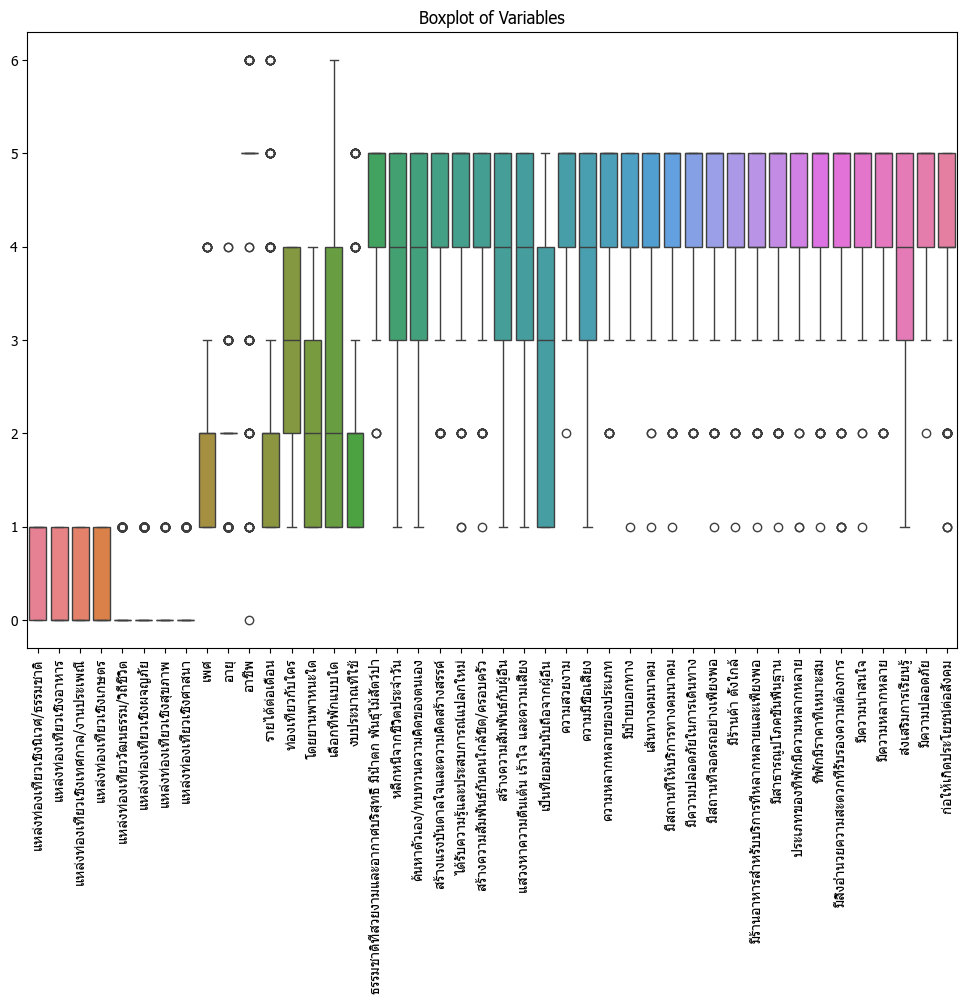

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# เลือกคอลัมน์ที่เป็นตัวเลือก (int64) ยกเว้น 'id_member'
columns_to_plot = df1.select_dtypes(include=['int64'])

# สร้าง Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns_to_plot)
plt.title('Boxplot of Variables')
plt.xticks(rotation=90)  # หมุนชื่อคอลัมน์เพื่อให้อ่านง่ายขึ้น
plt.show()



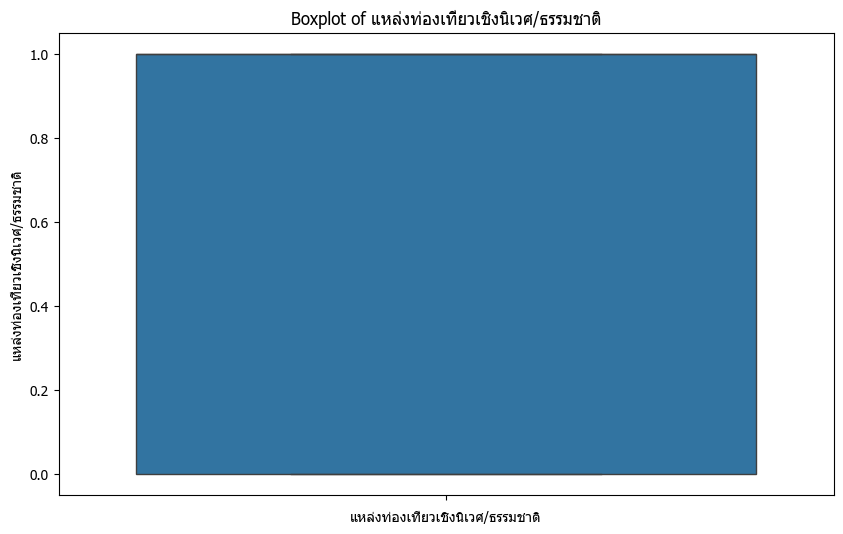

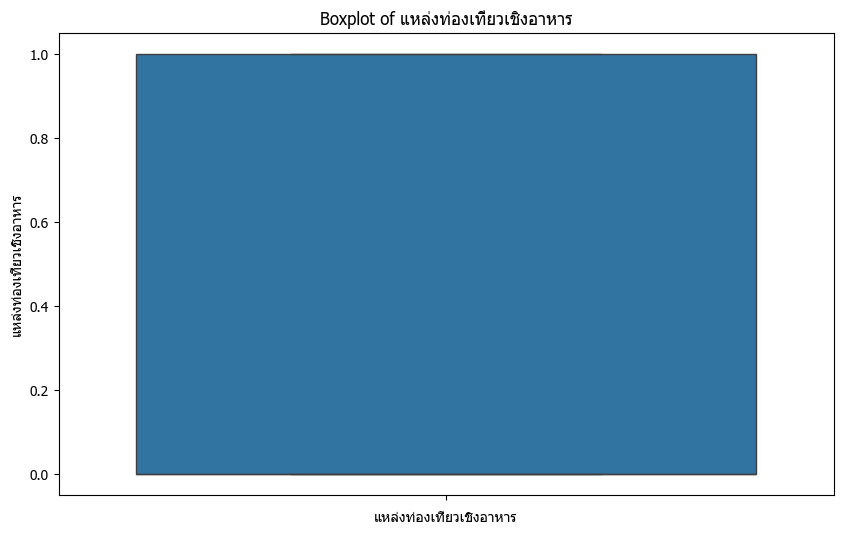

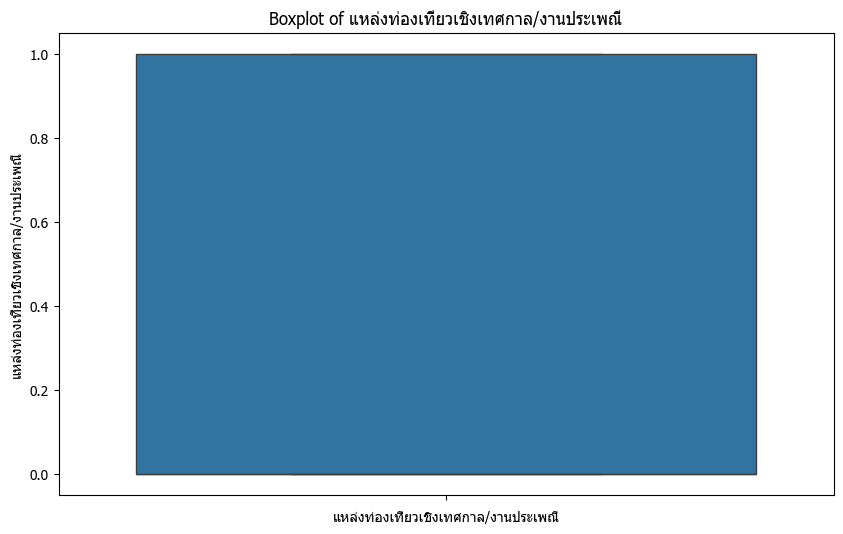

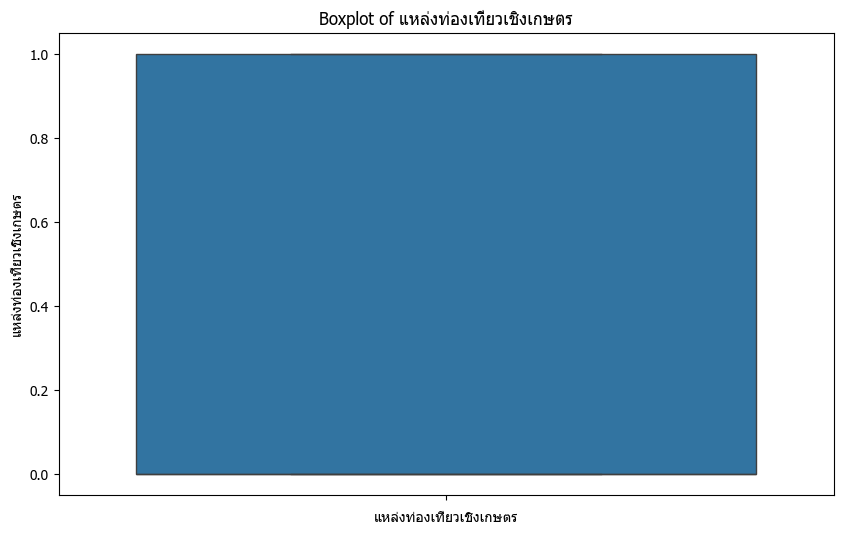

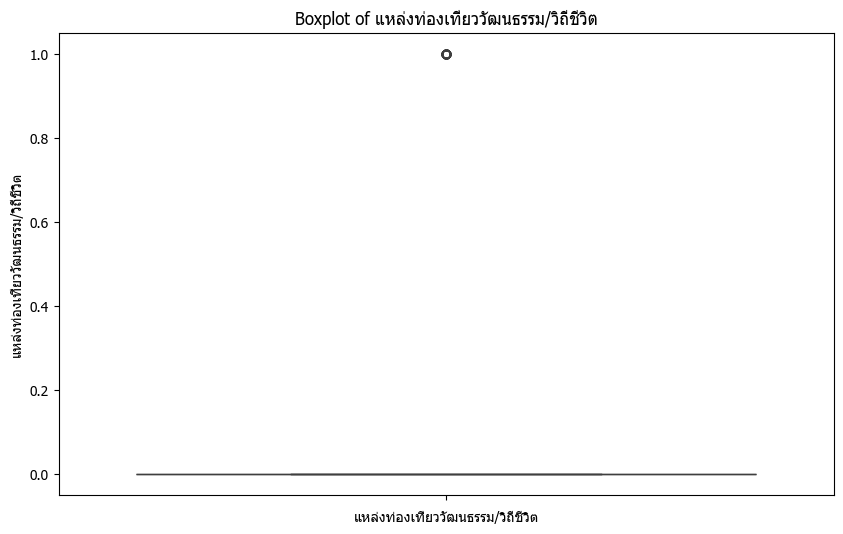

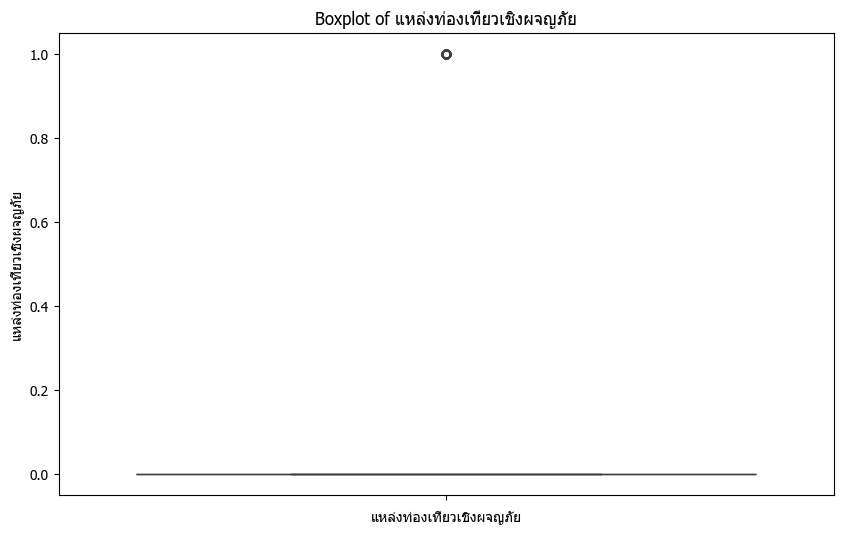

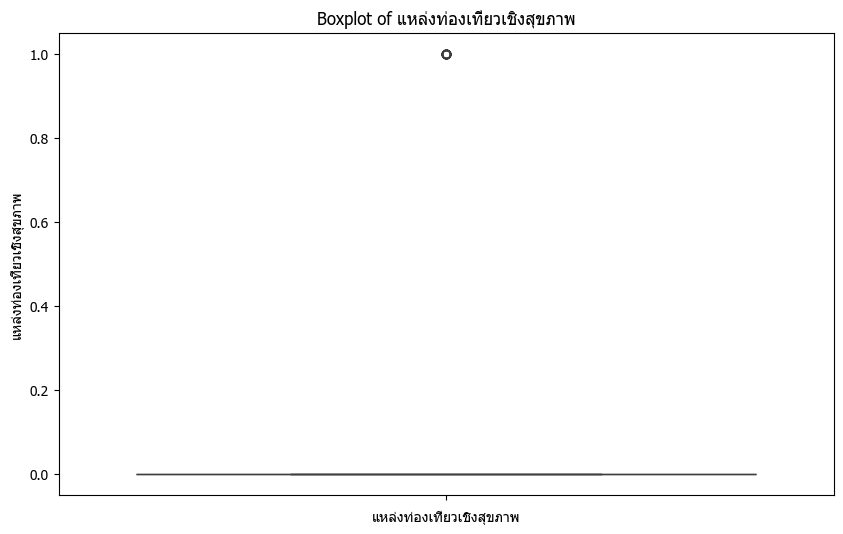

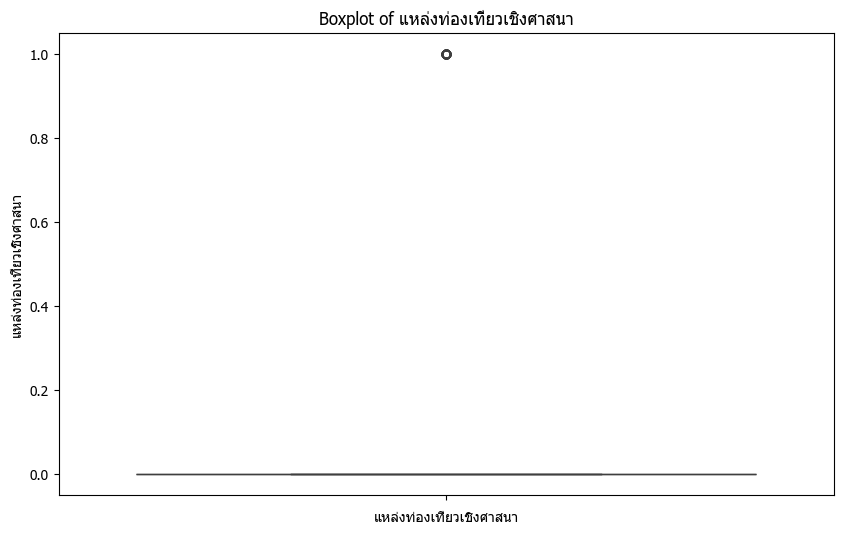

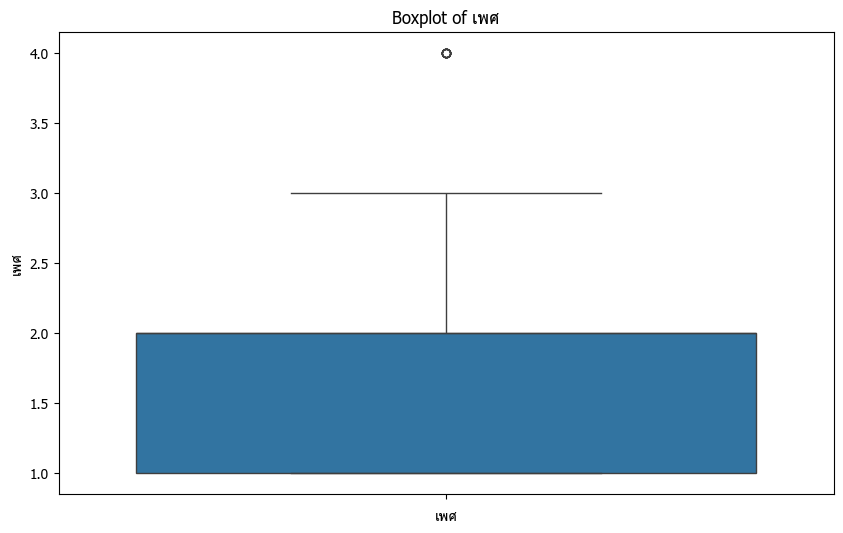

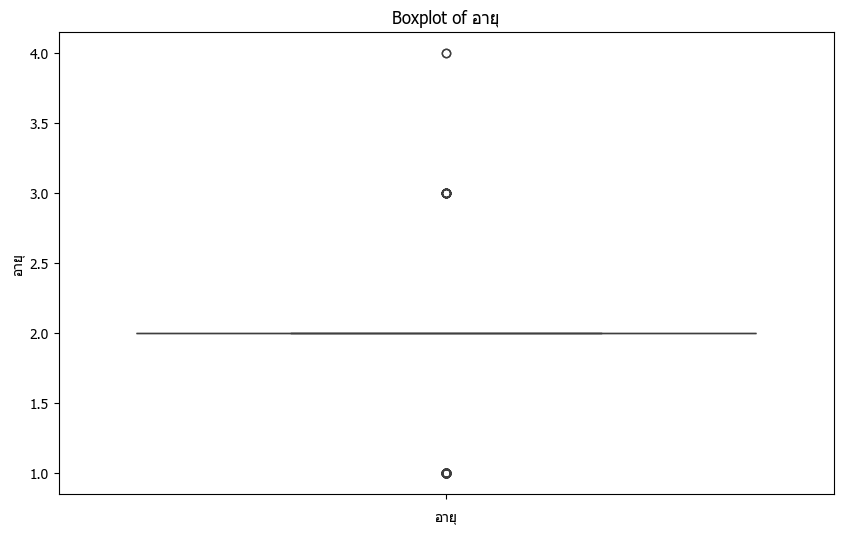

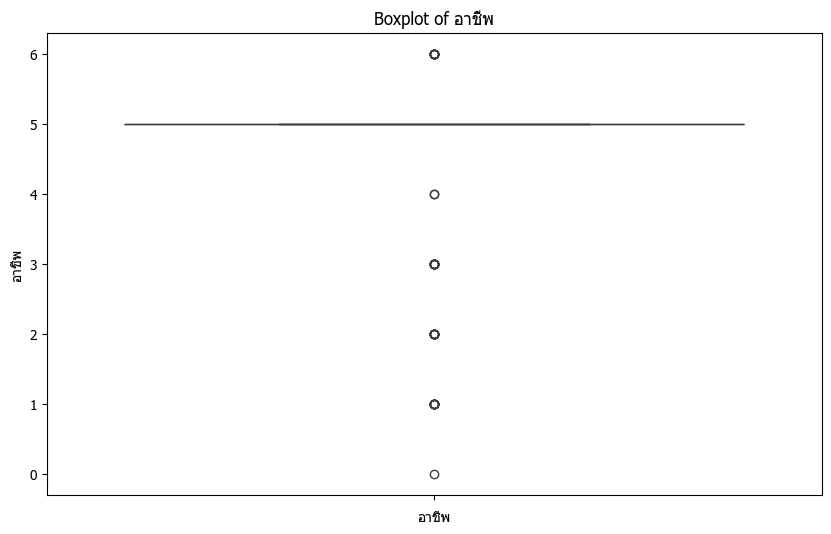

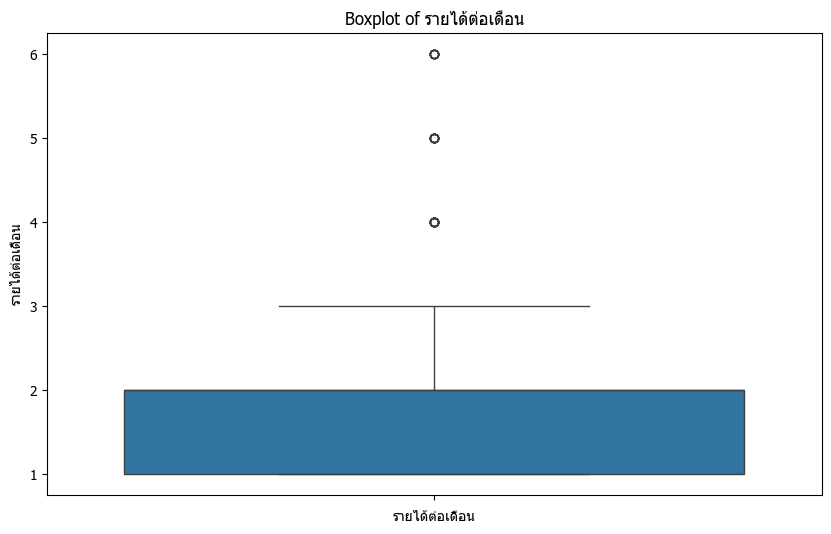

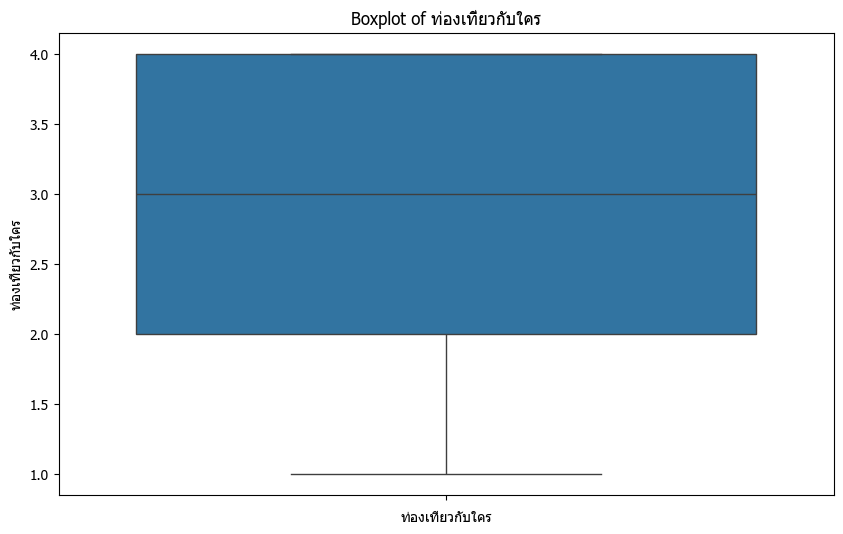

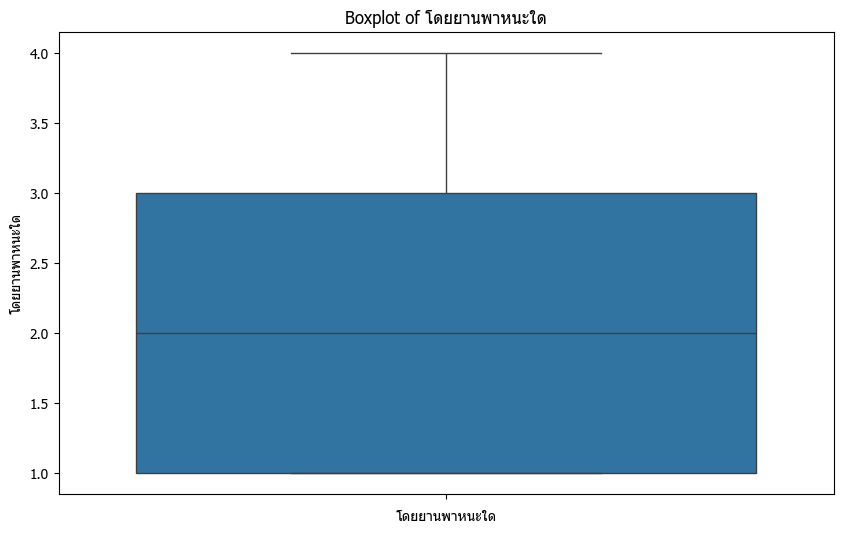

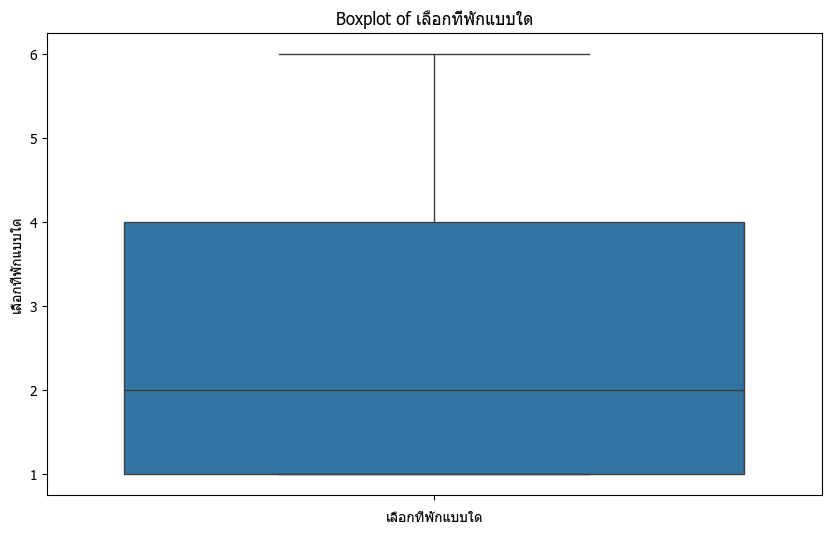

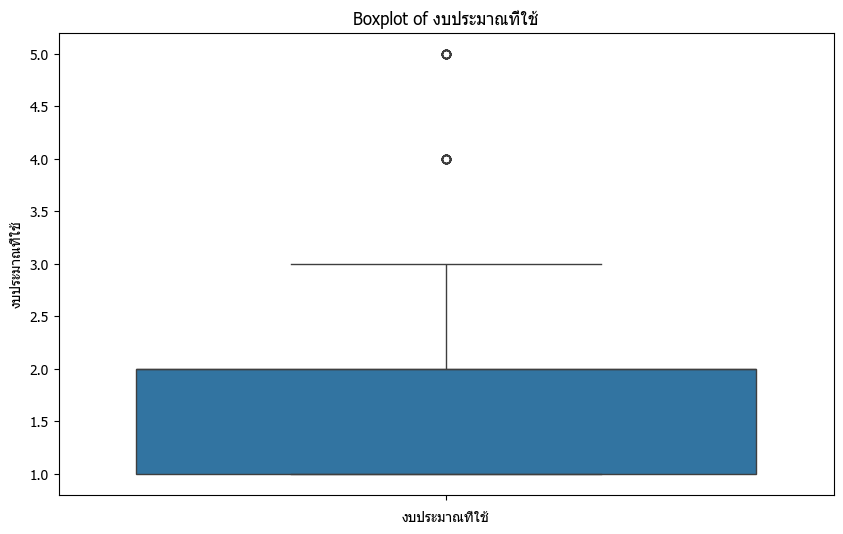

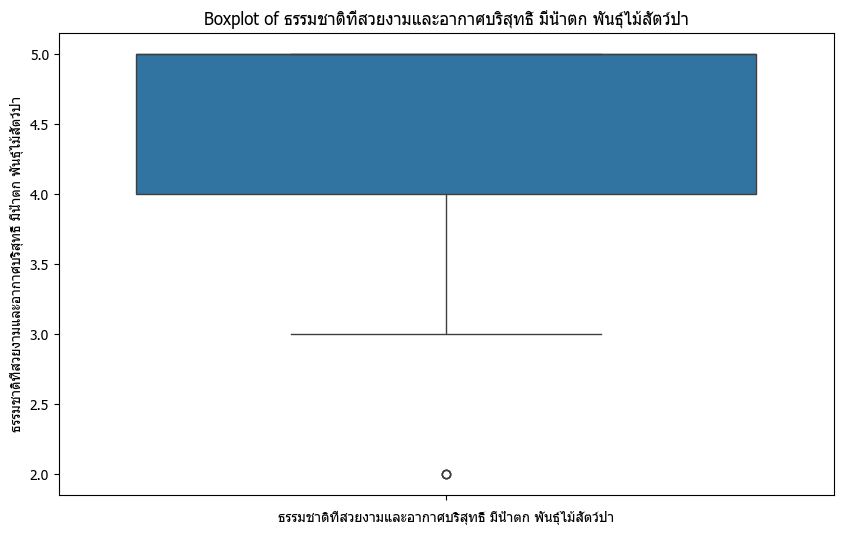

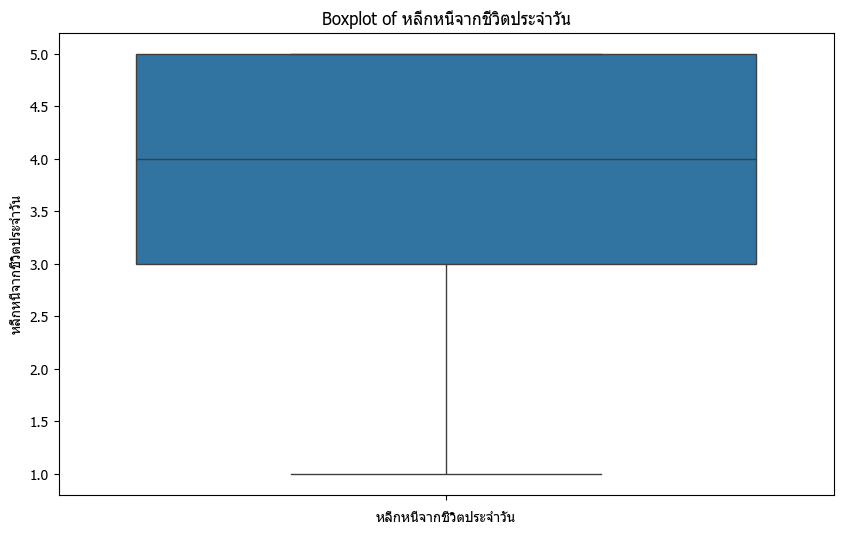

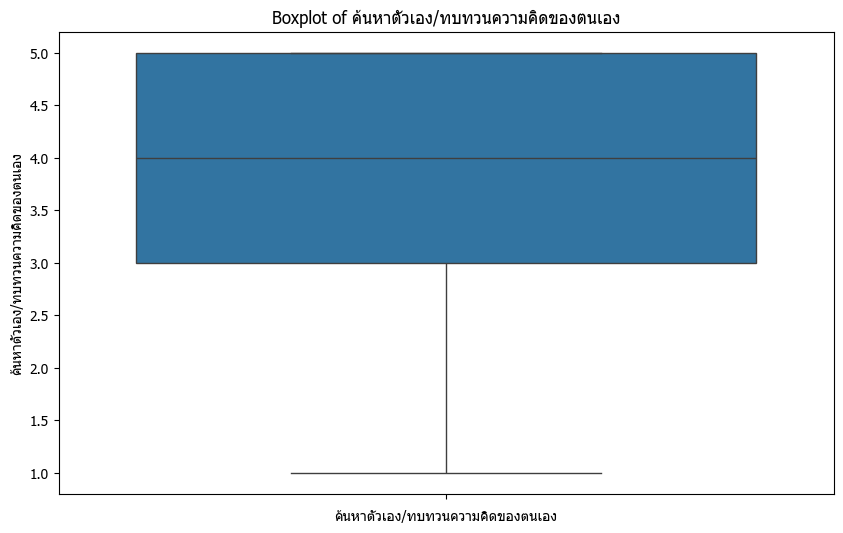

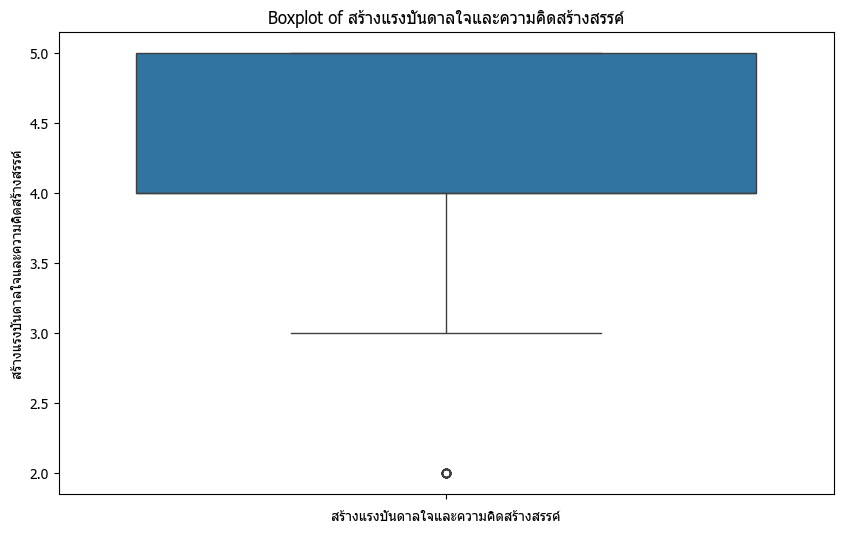

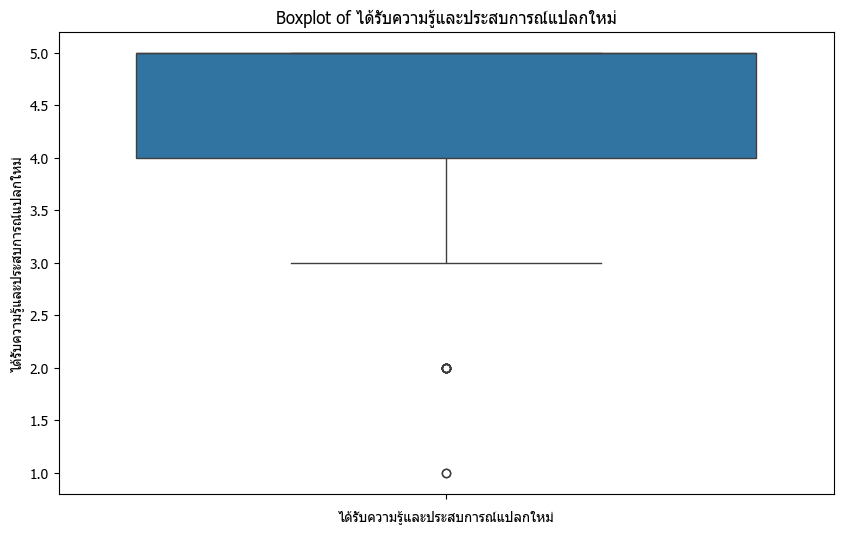

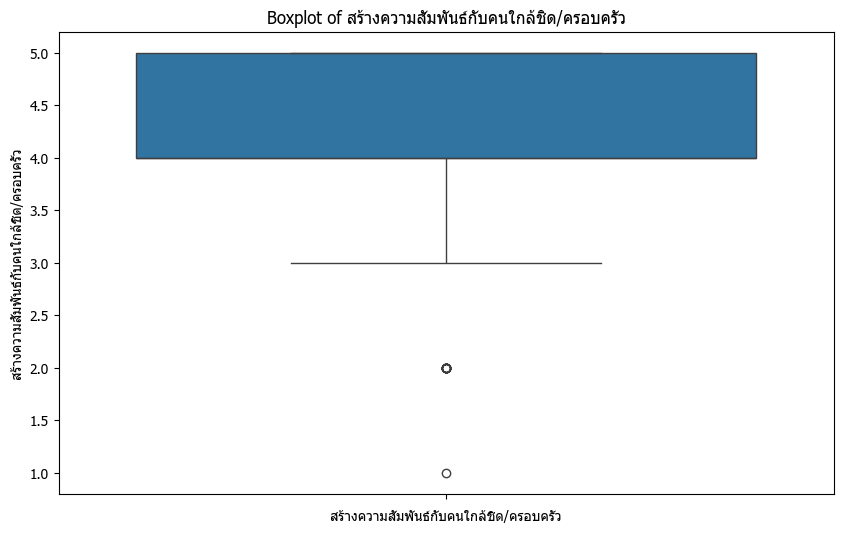

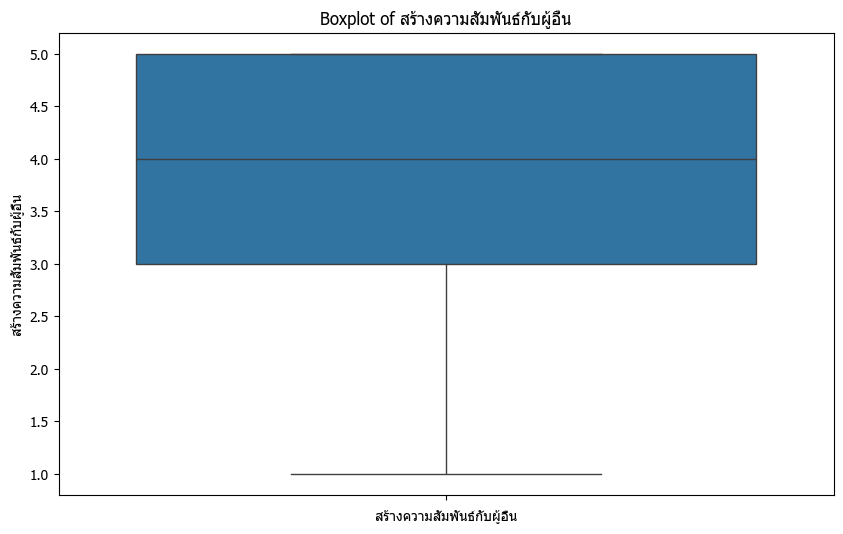

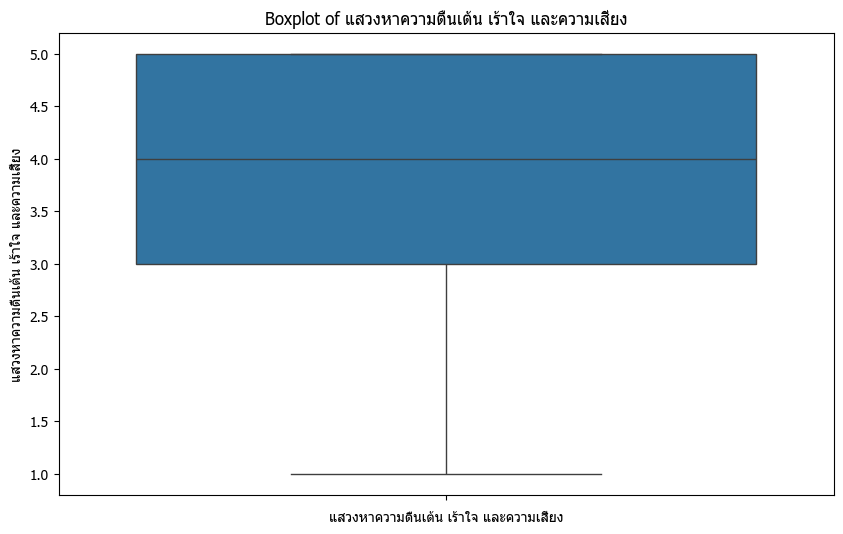

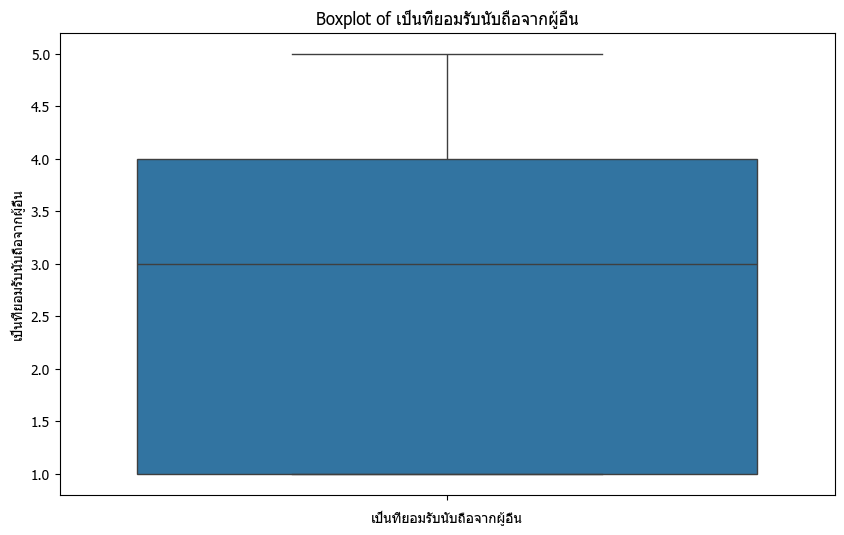

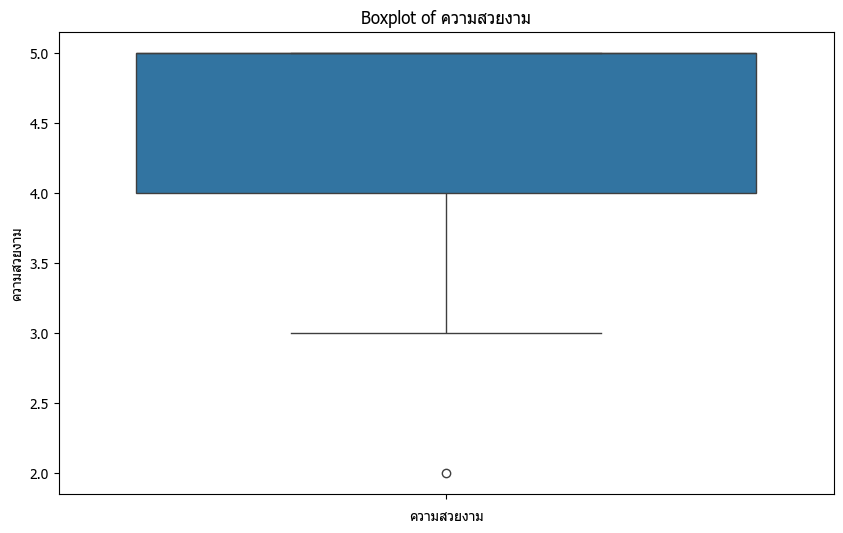

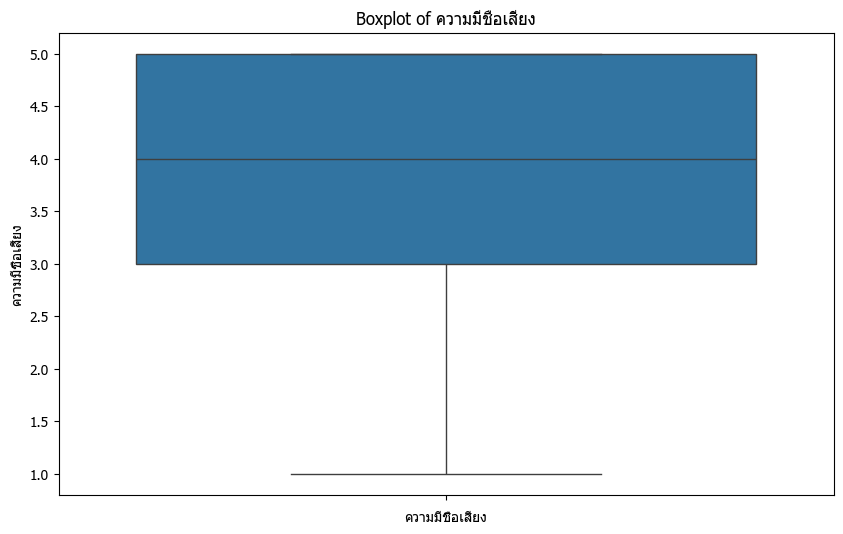

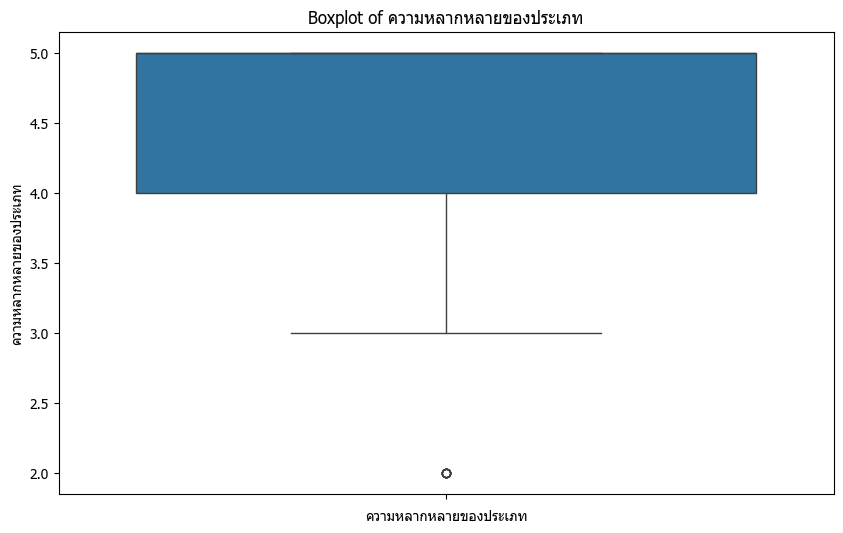

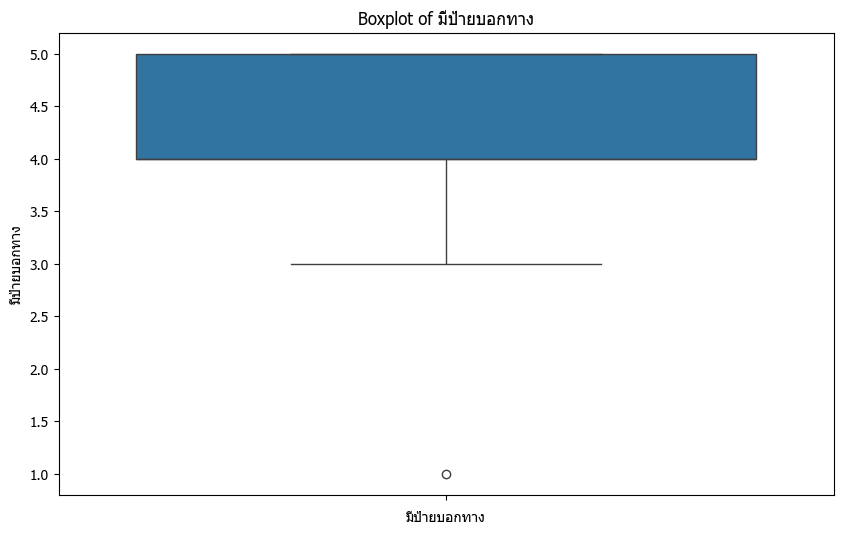

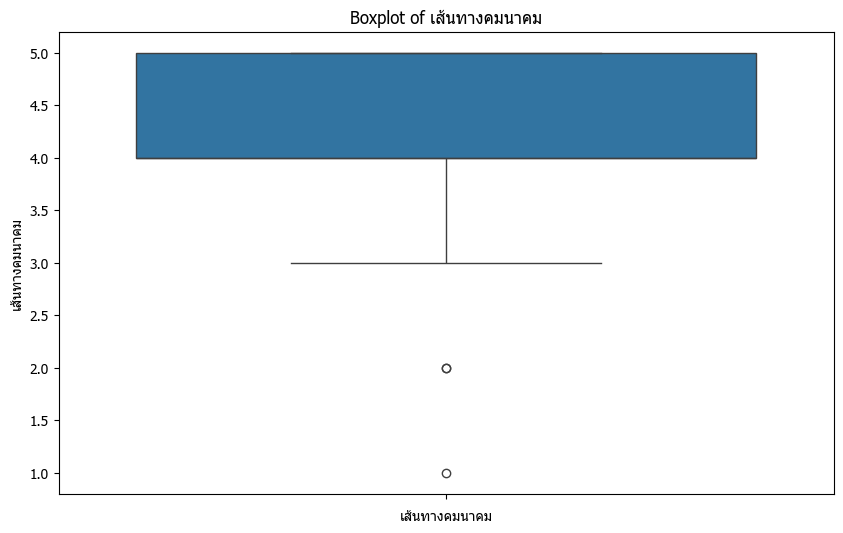

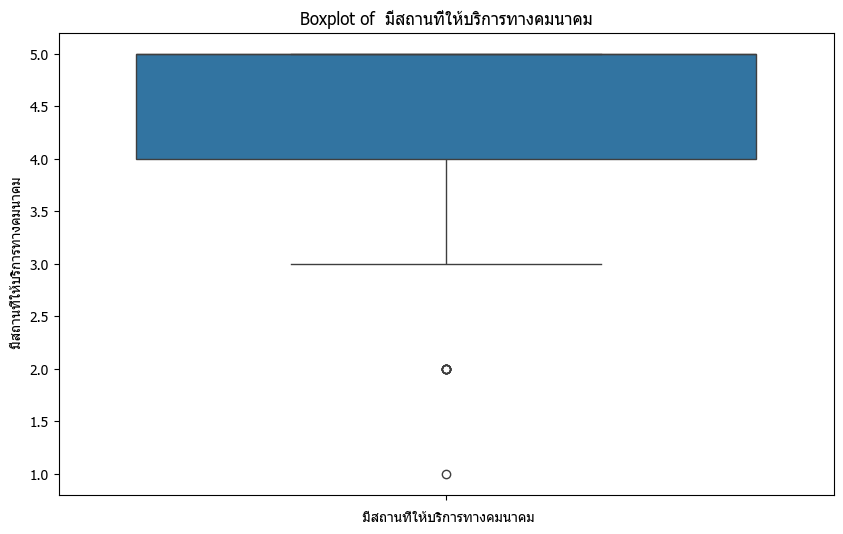

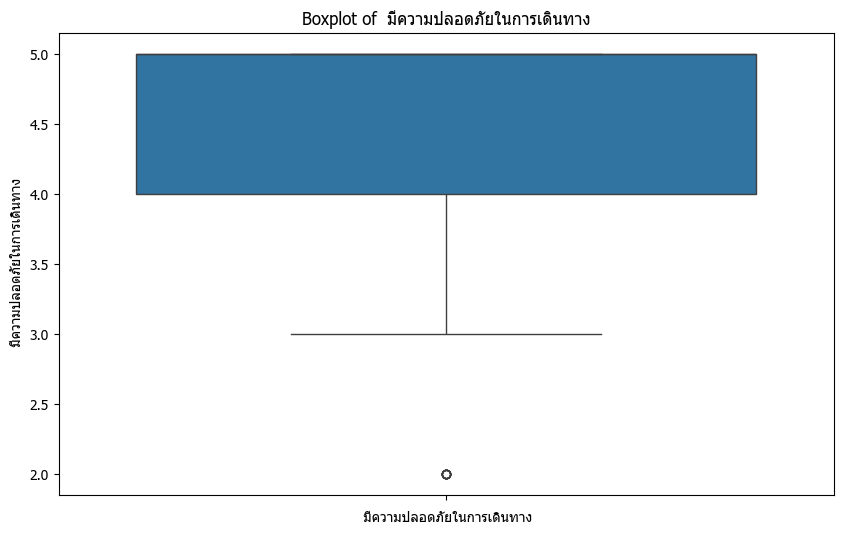

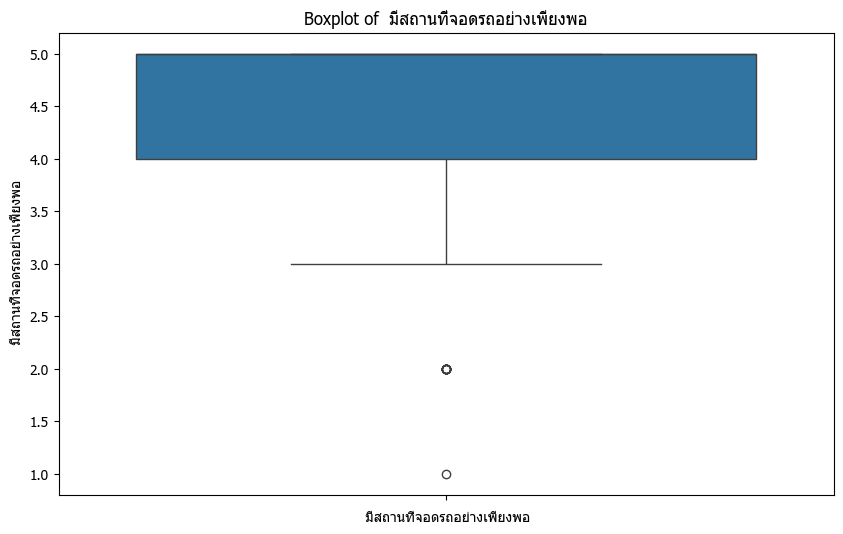

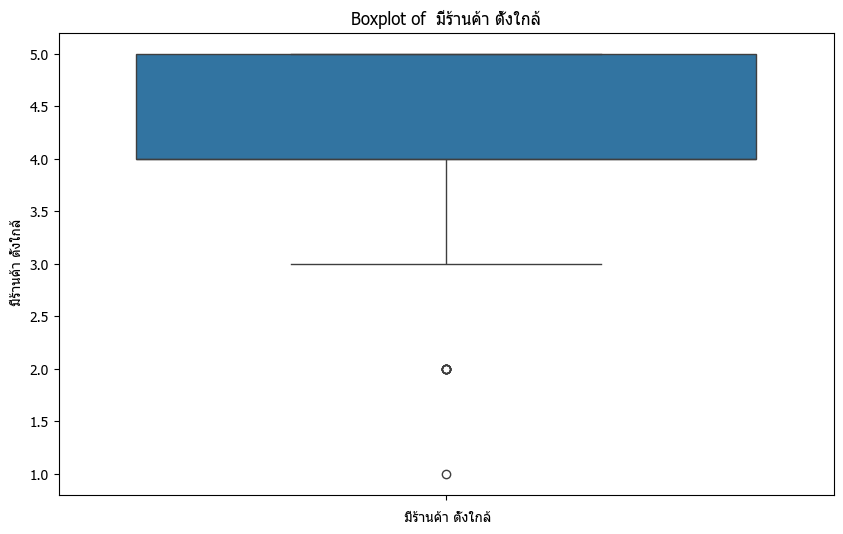

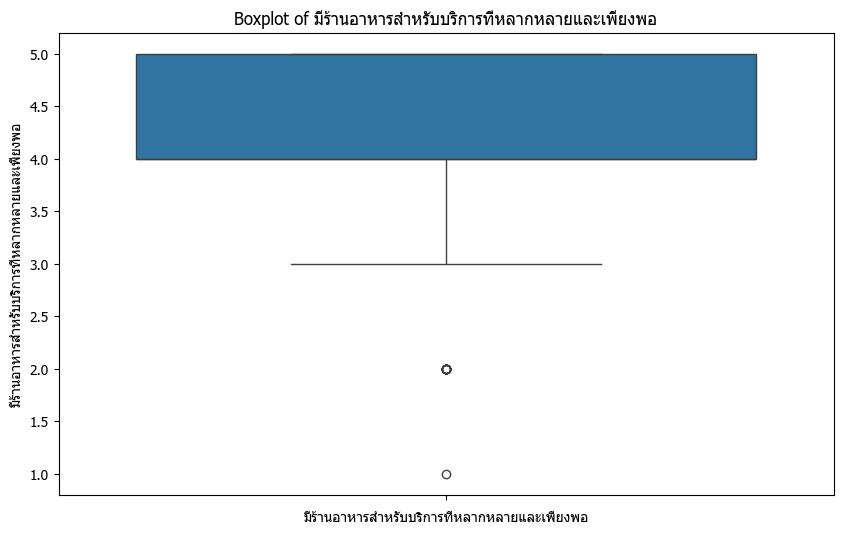

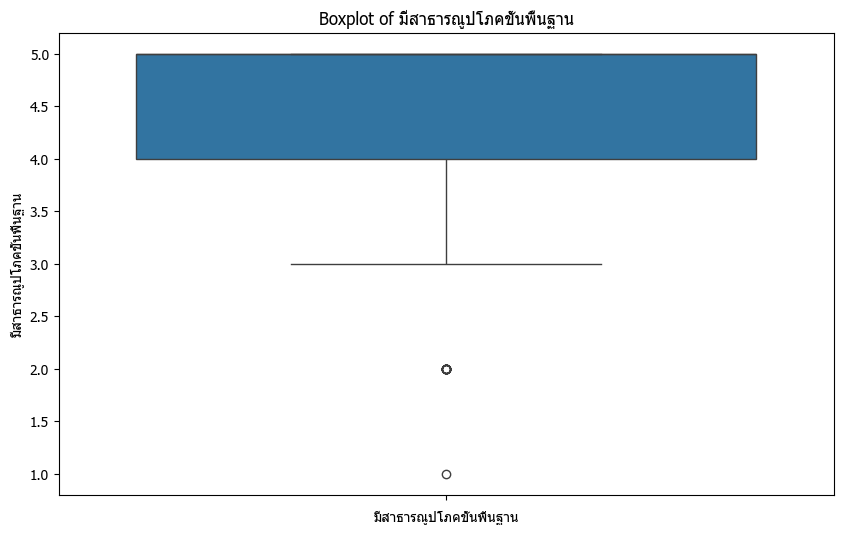

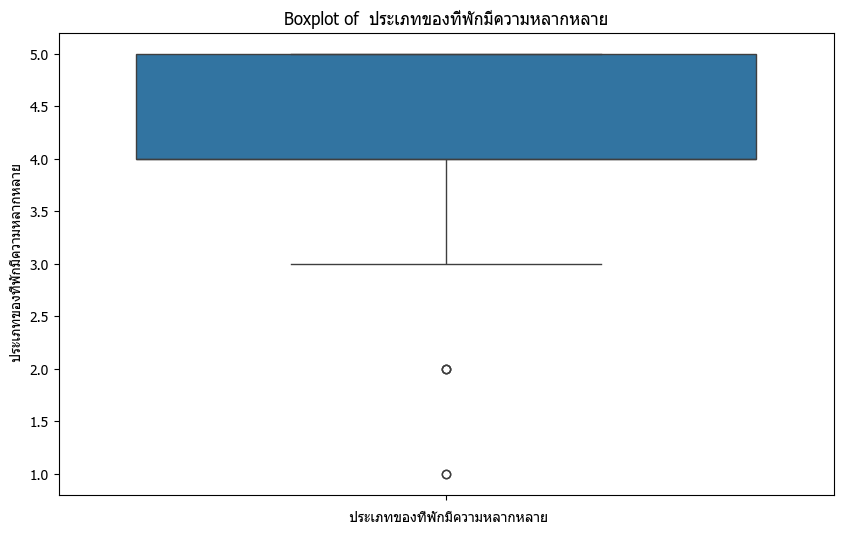

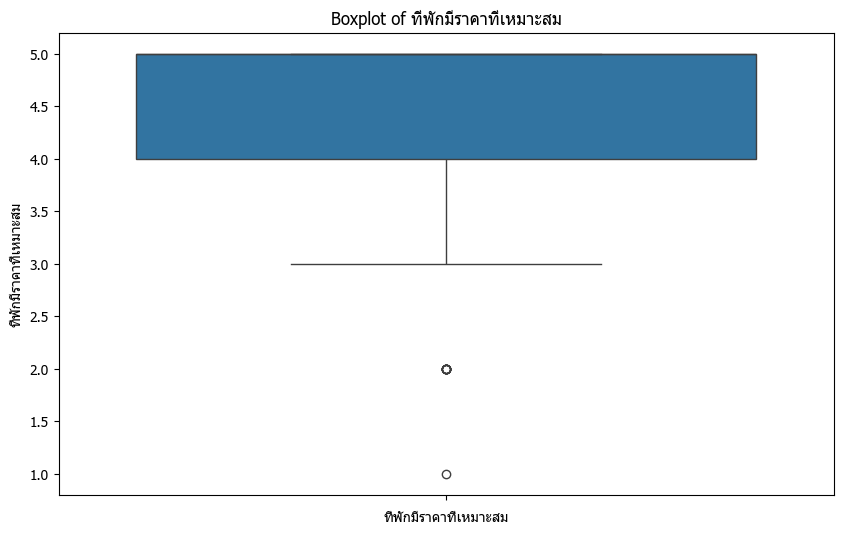

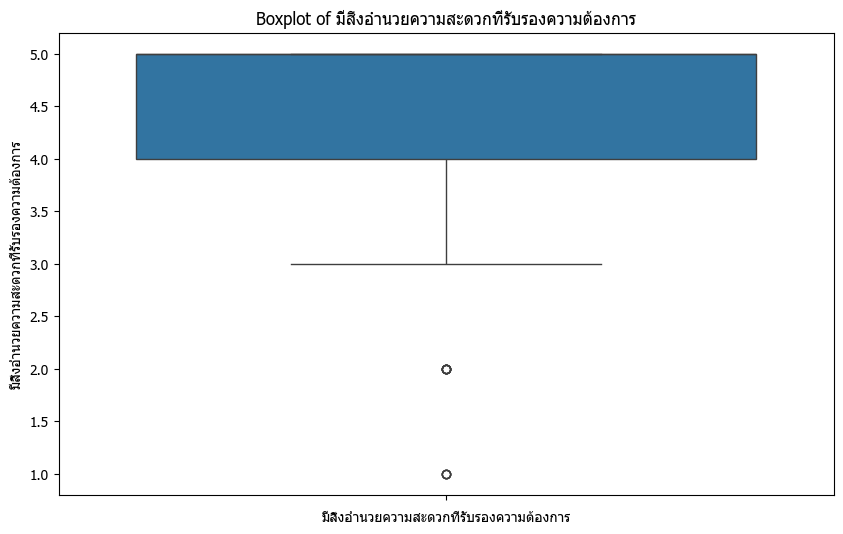

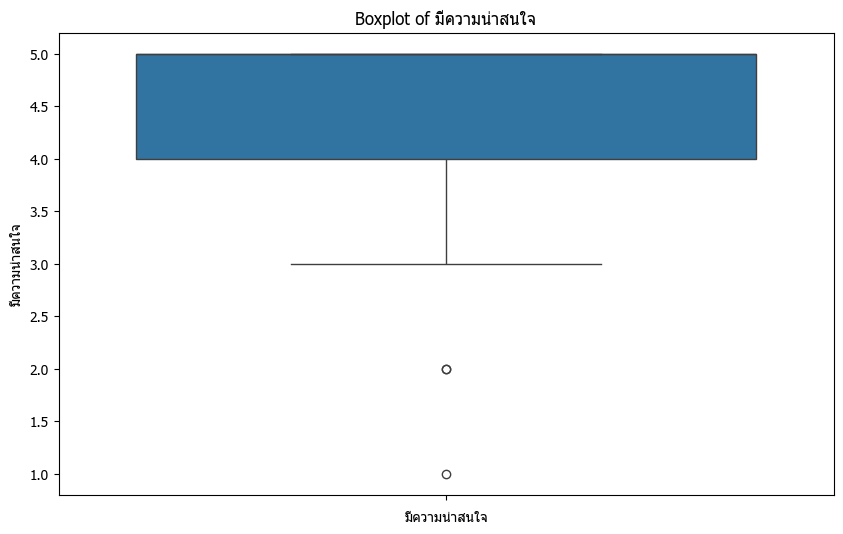

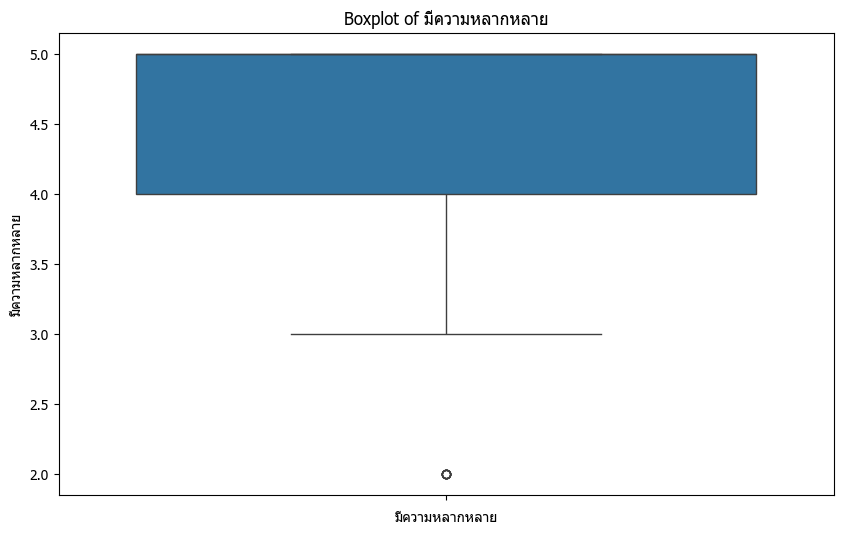

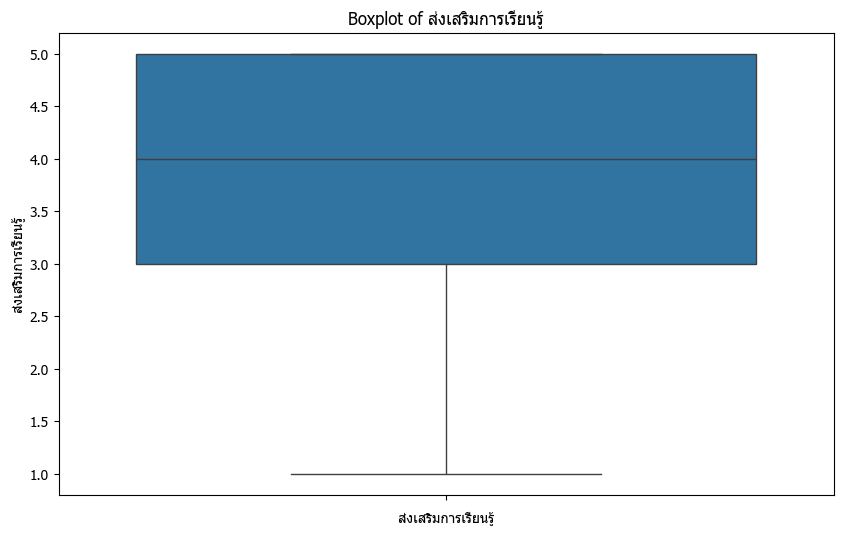

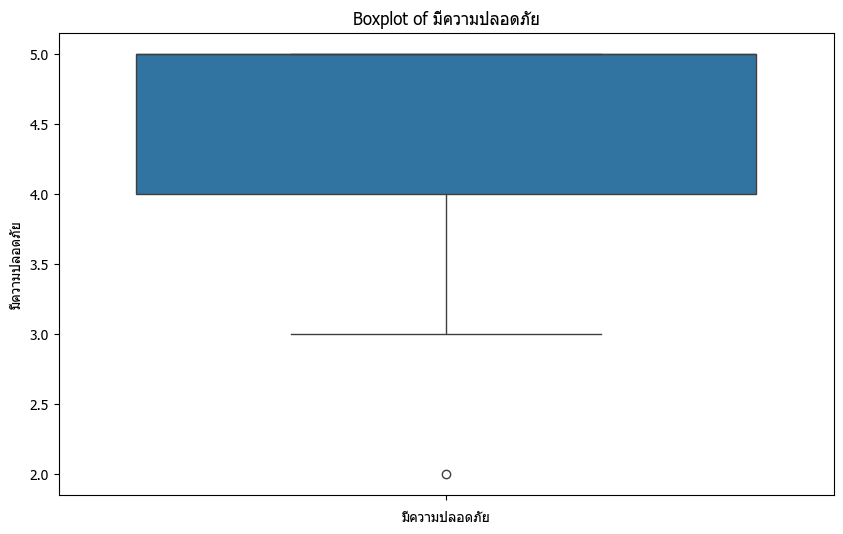

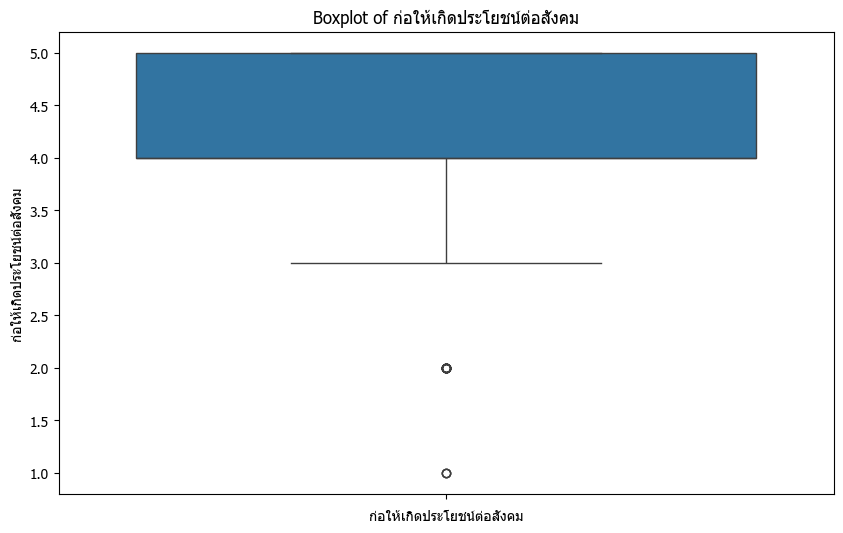

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# เลือกคอลัมน์ที่เป็นตัวเลือก (int64) ยกเว้น 'id_member'
columns_to_plot = df1.select_dtypes(include=['int64'])

# สร้าง Boxplot สำหรับแต่ละคอลัมน์
for col in columns_to_plot.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


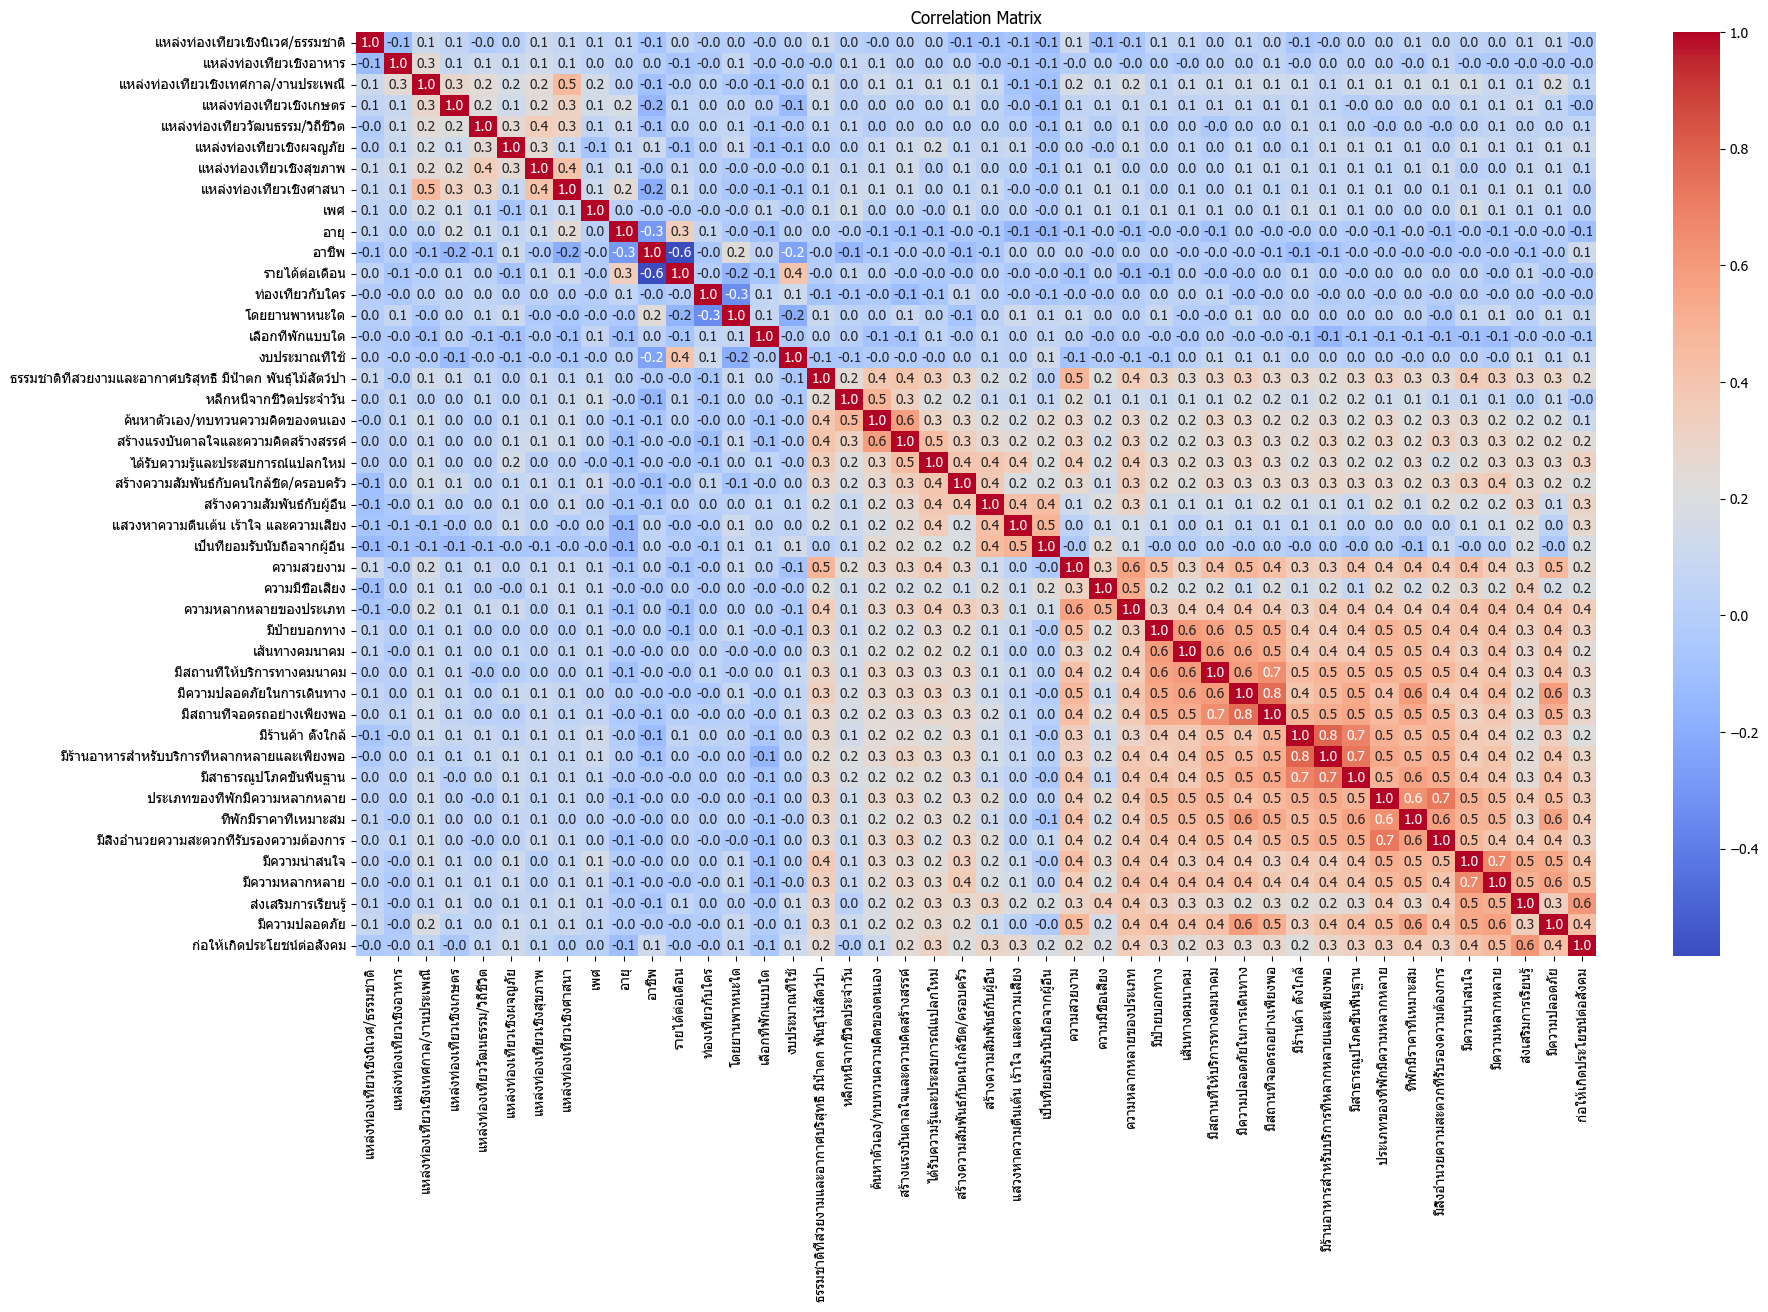

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณและแสดงเมทริกซ์ความสัมพันธ์
corr = df1.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df1.columns

Index(['แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ', 'แหล่งท่องเที่ยวเชิงอาหาร',
       'แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี', 'แหล่งท่องเที่ยวเชิงเกษตร',
       'แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต', 'แหล่งท่องเที่ยวเชิงผจญภัย',
       'แหล่งท่องเที่ยวเชิงสุขภาพ', 'แหล่งท่องเที่ยวเชิงศาสนา', 'เพศ', 'อายุ',
       'อาชีพ', 'รายได้ต่อเดือน', 'ท่องเที่ยวกับใคร', 'โดยยานพาหนะใด',
       'เลือกที่พักแบบใด', 'งบประมาณที่ใช้',
       'ธรรมชาติที่สวยงามและอากาศบริสุทธิ์ มีน้ำตก พันธุ์ไม้สัตว์ป่า',
       'หลีกหนีจากชีวิตประจำวัน', 'ค้นหาตัวเอง/ทบทวนความคิดของตนเอง',
       'สร้างแรงบันดาลใจและความคิดสร้างสรรค์',
       'ได้รับความรู้และประสบการณ์แปลกใหม่',
       'สร้างความสัมพันธ์กับคนใกล้ชิด/ครอบครัว', 'สร้างความสัมพันธ์กับผู้อื่น',
       'แสวงหาความตื่นเต้น เร้าใจ และความเสี่ยง',
       'เป็นที่ยอมรับนับถือจากผู้อื่น', 'ความสวยงาม', 'ความมีชื่อเสียง',
       'ความหลากหลายของประเภท', 'มีป้ายบอกทาง', 'เส้นทางคมนาคม',
       ' มีสถานที่ให้บริการทางคมนาคม', ' มีความปลอดภัยในการเดินทาง',
       ' มีสถาน

In [12]:
columns_to_drop = [' มีสถานที่จอดรถอย่างเพียงพอ']  # แก้ไขเป็นชื่อคอลัมน์ที่คุณต้องการลบ
df2 = df1.drop(columns=columns_to_drop)

NameError: name 'df1' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณและแสดงเมทริกซ์ความสัมพันธ์
corr = df2.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

NameError: name 'df2' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
features = df2
X_scaled = scaler.fit_transform(features)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# สมมติว่า X_scaled คือข้อมูลที่ถูกปรับขนาดแล้ว
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score}')


Number of clusters: 2, Silhouette Score: 0.2324061854502768
Number of clusters: 3, Silhouette Score: 0.16978777271880338
Number of clusters: 4, Silhouette Score: 0.16338232853433515
Number of clusters: 5, Silhouette Score: 0.14371272069434085
Number of clusters: 6, Silhouette Score: 0.1725927276522856
Number of clusters: 7, Silhouette Score: 0.14621919962455748
Number of clusters: 8, Silhouette Score: 0.17988529122568425
Number of clusters: 9, Silhouette Score: 0.1759395309729308
Number of clusters: 10, Silhouette Score: 0.15607027611651225
Number of clusters: 11, Silhouette Score: 0.15720387310599362
Number of clusters: 12, Silhouette Score: 0.15094470277428285
Number of clusters: 13, Silhouette Score: 0.15188465136183793
Number of clusters: 14, Silhouette Score: 0.1551659483868151
Number of clusters: 15, Silhouette Score: 0.14957449338284462
Number of clusters: 16, Silhouette Score: 0.14854459170684597
Number of clusters: 17, Silhouette Score: 0.1446431309320132
Number of clusters: 1

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ปรับขนาดข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# สร้างโมเดล KMeans และจัดกลุ่มข้อมูล
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# คำนวณค่า Silhouette Score
score = silhouette_score(X_scaled, clusters)
print(f'Number of clusters: {n_clusters}, Silhouette Score: {score}')

# ค้นหาข้อมูลที่อยู่ในกลุ่มที่ 3 (ค่า K เป็น 2 เนื่องจากกลุ่มเริ่มต้นที่ 0)
group_3_indices = [i for i, label in enumerate(clusters) if label == 2]

# แสดงข้อมูลในกลุ่มที่ 3
group_3_data = features.iloc[group_3_indices]

print(f'Indices of rows in cluster 3: {group_3_indices}')
print(f'Data in cluster 3:\n{group_3_data}')


Number of clusters: 3, Silhouette Score: 0.16978777271880338
Indices of rows in cluster 3: [0, 8, 9, 12, 14, 15, 22, 28, 34, 36, 38, 39, 40, 43, 49, 52, 54, 57, 58, 59, 61, 65, 68, 69, 70, 74, 75, 77, 78, 79, 80, 83, 84, 85, 92, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 114, 119, 120, 123, 126, 128, 130, 134, 135, 136, 137, 138, 143, 148, 151, 153, 154, 156, 158, 161, 162, 163, 165, 166, 169, 170, 174, 175, 176, 179, 183, 188, 189, 191, 193, 195, 198, 205, 208, 210, 213, 215, 217, 221, 223, 224, 226, 227, 229, 230, 231, 232, 238, 239, 241, 243, 244, 245, 247, 251, 253, 255, 256, 257, 259, 260, 263, 265, 268, 270, 271, 280, 281, 282, 284, 287, 288, 296, 298, 300, 301, 304, 308, 317, 323, 324, 328, 329, 330, 332, 333, 334, 335, 337, 345, 347, 350, 351, 352, 355, 356]
Data in cluster 3:
     ธรรมชาติที่สวยงามและอากาศบริสุทธิ์ มีน้ำตก พันธุ์ไม้สัตว์ป่า  \
0                                                    5              
8                                                  

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# ตรวจสอบค่า Calinski-Harabasz สำหรับจำนวนกลุ่มที่ต่างกัน
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, clusters)
    print(f'Number of clusters: {n_clusters}, Calinski-Harabasz Index: {score}')


Number of clusters: 2, Calinski-Harabasz Index: 67.1745900694195
Number of clusters: 3, Calinski-Harabasz Index: 42.806496686514876
Number of clusters: 4, Calinski-Harabasz Index: 37.13307804760543
Number of clusters: 5, Calinski-Harabasz Index: 31.333774270408192
Number of clusters: 6, Calinski-Harabasz Index: 26.947145171426467
Number of clusters: 7, Calinski-Harabasz Index: 24.0946635383593
Number of clusters: 8, Calinski-Harabasz Index: 21.817654856501207
Number of clusters: 9, Calinski-Harabasz Index: 19.97691544049947
Number of clusters: 10, Calinski-Harabasz Index: 18.54472835619444
Number of clusters: 11, Calinski-Harabasz Index: 17.32189993580651
Number of clusters: 12, Calinski-Harabasz Index: 16.261560323314434
Number of clusters: 13, Calinski-Harabasz Index: 15.304398781988269
Number of clusters: 14, Calinski-Harabasz Index: 14.526035774896576
Number of clusters: 15, Calinski-Harabasz Index: 13.495957650988306
Number of clusters: 16, Calinski-Harabasz Index: 12.840287959593

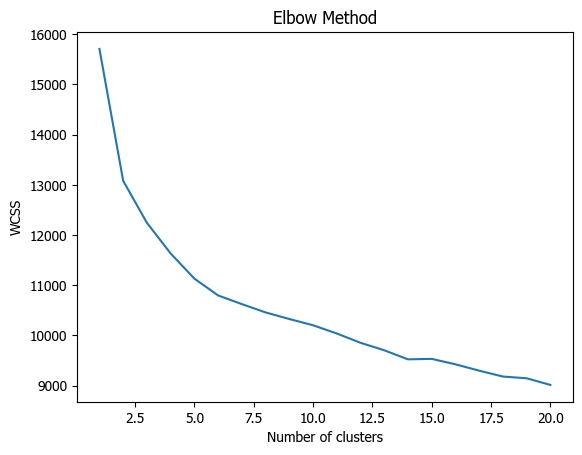

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for n_clusters in range(1, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


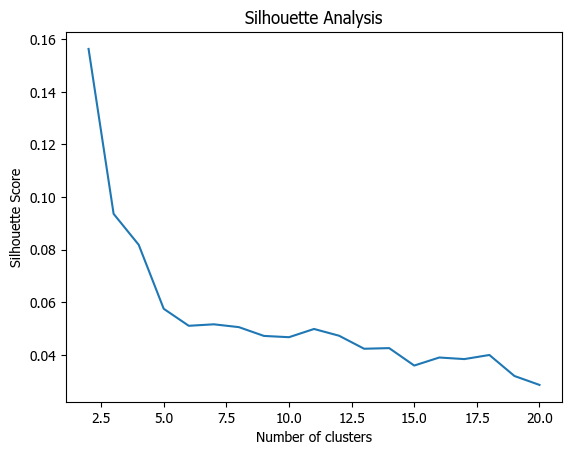

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sil_scores = []
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    sil_scores.append(score)

plt.plot(range(2, 21), sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


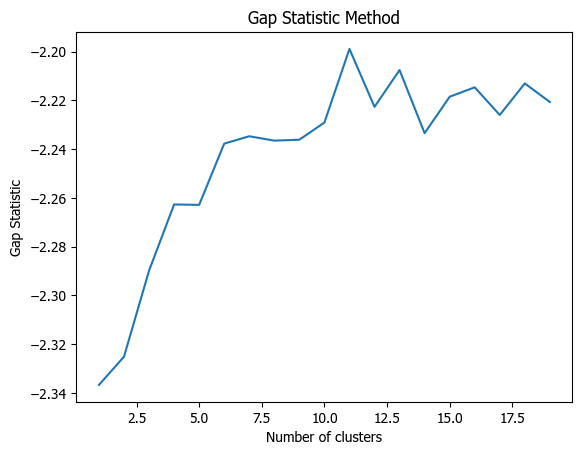

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

def gap_statistic(X, kmax):
    gaps = np.zeros(kmax - 1)
    for k in range(1, kmax):
        kmeans = KMeans(n_clusters=k + 1, random_state=42).fit(X)
        clusters = kmeans.predict(X)
        # Compute the gap statistic
        wcss = kmeans.inertia_
        reference = np.random.random_sample(size=X.shape)
        reference_wcss = KMeans(n_clusters=k + 1, random_state=42).fit(reference).inertia_
        gaps[k - 1] = np.log(reference_wcss / wcss)
    return gaps

gaps = gap_statistic(X_scaled, 20)
plt.plot(range(1, 20), gaps)
plt.xlabel('Number of clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic Method')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# กำหนดจำนวนกลุ่มที่ต้องการ
k = 12  # จำนวนกลุ่มที่ต้องการ (เลือกจำนวนที่เหมาะสมกับข้อมูลของคุณ)

# สร้างโมเดล K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# เพิ่มผลลัพธ์ clustering กลับไปที่ DataFrame
df1['Cluster'] = clusters

# แสดงผลลัพธ์
df1


,แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ,แหล่งท่องเที่ยวเชิงอาหาร,แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี,แหล่งท่องเที่ยวเชิงเกษตร,แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต,แหล่งท่องเที่ยวเชิงผจญภัย,แหล่งท่องเที่ยวเชิงสุขภาพ,แหล่งท่องเที่ยวเชิงศาสนา,เพศ,อายุ,...,มีสาธารณูปโภคขั้นพื้นฐาน,ประเภทของที่พักมีความหลากหลาย,ที่พักมีราคาที่เหมาะสม,มีสิ่งอำนวยความสะดวกที่รับรองความต้องการ,มีความน่าสนใจ,มีความหลากหลาย,ส่งเสริมการเรียนรู้,มีความปลอดภัย,ก่อให้เกิดประโยชน์ต่อสังคม,Cluster
0,1,0,0,0,0,0,0,0,1,2,...,5,5,5,5,5,5,5,5,5,4
1,1,0,0,0,0,0,0,0,1,2,...,4,3,5,4,5,5,5,5,5,1
2,1,1,0,0,0,0,0,0,1,2,...,5,5,5,5,5,5,5,5,5,0
3,1,1,1,0,0,0,0,0,2,2,...,4,3,4,3,3,3,4,4,3,3
4,1,0,0,1,1,0,0,0,2,2,...,4,5,5,3,5,5,5,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,1,0,0,0,0,0,0,0,2,2,...,4,5,5,5,5,5,5,5,5,4
353,1,0,0,0,0,0,0,0,1,3,...,3,4,4,4,4,3,4,3,3,11
354,1,0,1,1,0,0,0,1,2,3,...,3,5,5,5,5,5,4,5,4,7
355,0,1,1,0,0,0,0,0,3,2,...,3,3,4,3,4,2,3,3,3,6


In [ ]:
# ดูการกระจายของกลุ่ม
print(df1['Cluster'].value_counts())

# ดูค่าเฉลี่ยของแต่ละฟีเจอร์ในแต่ละกลุ่ม
cluster_means = df1.groupby('Cluster').mean()
cluster_means


Cluster
4     71
0     45
1     36
3     36
7     31
5     28
2     25
6     25
9     21
10    17
11    15
8      7
Name: count, dtype: int64


,แหล่งท่องเที่ยวเชิงนิเวศ/ธรรมชาติ,แหล่งท่องเที่ยวเชิงอาหาร,แหล่งท่องเที่ยวเชิงเทศกาล/งานประเพณี,แหล่งท่องเที่ยวเชิงเกษตร,แหล่งท่องเที่ยววัฒนธรรม/วิถีชีวิต,แหล่งท่องเที่ยวเชิงผจญภัย,แหล่งท่องเที่ยวเชิงสุขภาพ,แหล่งท่องเที่ยวเชิงศาสนา,เพศ,อายุ,...,มีร้านอาหารสำหรับบริการที่หลากหลายและเพียงพอ,มีสาธารณูปโภคขั้นพื้นฐาน,ประเภทของที่พักมีความหลากหลาย,ที่พักมีราคาที่เหมาะสม,มีสิ่งอำนวยความสะดวกที่รับรองความต้องการ,มีความน่าสนใจ,มีความหลากหลาย,ส่งเสริมการเรียนรู้,มีความปลอดภัย,ก่อให้เกิดประโยชน์ต่อสังคม
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.777778,0.400000,0.311111,0.177778,0.044444,0.200000,0.000000,0.044444,1.622222,1.688889,...,4.844444,4.888889,4.911111,4.933333,4.888889,4.888889,4.911111,4.600000,4.933333,4.555556
1,0.805556,0.333333,0.222222,0.250000,0.222222,0.305556,0.027778,0.166667,1.583333,1.861111,...,3.527778,3.694444,3.888889,4.138889,3.694444,4.611111,4.555556,4.472222,4.583333,4.305556
2,0.960000,0.680000,0.920000,0.720000,0.240000,0.120000,0.000000,0.920000,1.840000,2.160000,...,4.600000,4.840000,4.840000,4.840000,4.800000,4.880000,4.840000,4.600000,4.880000,4.000000
3,0.805556,0.555556,0.138889,0.055556,0.027778,0.111111,0.000000,0.055556,1.305556,1.972222,...,4.055556,4.277778,3.805556,4.111111,3.777778,3.694444,3.833333,3.388889,4.222222,3.777778
4,0.690141,0.422535,0.154930,0.126761,0.140845,0.253521,0.014085,0.028169,1.746479,1.816901,...,4.718310,4.746479,4.732394,4.830986,4.774648,4.887324,4.873239,4.704225,4.929577,4.859155
5,0.357143,0.535714,0.250000,0.321429,0.107143,0.285714,0.035714,0.250000,1.892857,2.000000,...,4.250000,4.357143,3.785714,3.678571,3.928571,4.178571,3.964286,3.892857,4.000000,3.892857
6,0.680000,0.400000,0.200000,0.360000,0.080000,0.080000,0.000000,0.120000,1.800000,2.000000,...,3.160000,2.880000,3.040000,3.120000,2.960000,3.520000,3.560000,3.320000,3.400000,3.080000
7,0.903226,0.419355,0.225806,0.322581,0.032258,0.129032,0.000000,0.064516,1.709677,1.935484,...,4.129032,4.548387,4.322581,4.709677,4.354839,4.419355,4.096774,3.129032,4.741935,3.258065
8,1.000000,0.571429,0.714286,0.571429,1.000000,0.857143,0.714286,0.714286,1.142857,2.142857,...,4.571429,4.428571,4.142857,4.285714,4.142857,3.714286,3.857143,3.857143,4.428571,4.000000


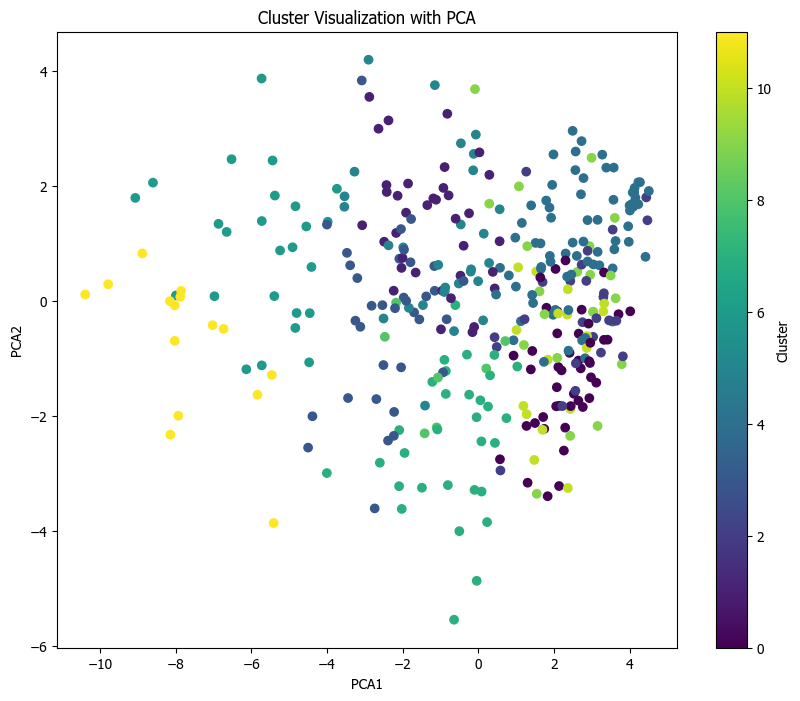

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ลดมิติข้อมูลเหลือ 2 มิติ
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# เพิ่มผลลัพธ์ของ PCA กลับไปที่ DataFrame
df1['PCA1'] = pca_result[:, 0]
df1['PCA2'] = pca_result[:, 1]

# แสดงกราฟการกระจายตัวของแต่ละกลุ่ม
plt.figure(figsize=(10, 8))
plt.scatter(df1['PCA1'], df1['PCA2'], c=df1['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score

# คำนวณค่า Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {db_score}')


Davies-Bouldin Index: 3.0002705908970544
